In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import shap
from tqdm import tqdm
from scipy import stats

# Sklearn imports
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

# Other ML libraries
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Optuna imports
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner

# Set pandas display options
pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings("ignore")
import logging
optuna.logging.set_verbosity(optuna.logging.WARNING)
logging.basicConfig(level=logging.WARNING)

In [4]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ
df = pd.read_excel('data.xlsx')

In [7]:
df

Unnamed: 0    IC50, mM    CC50, mM         SI  MaxAbsEStateIndex  \
0              0    6.239374  175.482382  28.125000           5.094096   
1              1    0.771831    5.402819   7.000000           3.961417   
2              2  223.808778  161.142320   0.720000           2.627117   
3              3    1.705624  107.855654  63.235294           5.097360   
4              4  107.131532  139.270991   1.300000           5.150510   
...          ...         ...         ...        ...                ...   
996          996   31.000104   34.999650   1.129017          12.934891   
997          997   31.999934   33.999415   1.062484          13.635345   
998          998   30.999883   33.999458   1.096761          13.991690   
999          999   31.998959   32.999644   1.031272          13.830180   
1000        1000   99.999531   99.999531   1.000000          13.380863   

      MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0           5.094096           0.387225        0.387225  0.417362  42.928571   
1           3.961417           0.533868        0.533868  0.462473  45.214286   
2           2.627117           0.543231        0.543231  0.260923  42.187500   
3           5.097360           0.390603        0.390603  0.377846  41.862069   
4           5.150510           0.270476        0.270476  0.429038  36.514286   
...              ...                ...             ...       ...        ...   
996        12.934891           0.048029       -0.476142  0.382752  49.133333   
997        13.635345           0.030329       -0.699355  0.369425  44.542857   
998        13.991690           0.026535       -0.650790  0.284923  41.973684   
999        13.830180           0.146522       -1.408652  0.381559  39.000000   
1000       13.380863           0.002425       -0.447978  0.452565  48.580645   

        MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0     384.652         340.300  384.350449                  158   
1     388.684         340.300  388.381750                  162   
2     446.808         388.344  446.458903                  186   
3     398.679         352.311  398.366099                  164   
4     466.713         424.377  466.334799                  184   
...       ...             ...         ...                  ...   
996   414.542         380.270  414.240624                  164   
997   485.621         446.309  485.277738                  192   
998   545.742         502.398  545.281109                  210   
999   522.635         480.299  522.282883                  208   
1000  426.597         388.293  426.277010                  170   

      NumRadicalElectrons  MaxPartialCharge  MinPartialCharge  \
0                       0          0.038844         -0.293526   
1                       0          0.012887         -0.313407   
2                       0          0.094802         -0.325573   
3                       0          0.038844         -0.293526   
4                       0          0.062897         -0.257239   
...                   ...               ...               ...   
996                     0          0.317890         -0.468587   
997                     0          0.327562         -0.467493   
998                     0          0.327887         -0.467485   
999                     0          0.312509         -0.468755   
1000                    0          0.311311         -0.468587   

      MaxAbsPartialCharge  MinAbsPartialCharge  FpDensityMorgan1  \
0                0.293526             0.038844          0.642857   
1                0.313407             0.012887          0.607143   
2                0.325573             0.094802          0.562500   
3                0.293526             0.038844          0.620690   
4                0.257239             0.062897          0.600000   
...                   ...                  ...               ...   
996              0.468587             0.317890          1.133333   
997              0.467493             

–î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç 1001 —Å—Ç—Ä–æ–∫—É –∏ 214 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –°—Ä–∞–∑—É –º–æ–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ "Unnamed: 0".

In [9]:
# –£–¥–∞–ª—è–µ–º –Ω–µ–º–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
df = df.drop(columns = ['Unnamed: 0'])

In [10]:
# –£–¥–∞–ª—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏
df = df.dropna()

In [11]:
df.shape

(998, 213)

In [17]:
# –£–¥–∞–ª—è–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã
df = df.drop_duplicates()

In [19]:
df.shape

(966, 213)

In [21]:
def detect_outliers(df, alpha=0.05, method='iqr', normality_test='shapiro', add_sum_column=False):
    """
    –û–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –≤ DataFrame —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –º–µ—Ç–æ–¥–æ–≤.
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    ----------
    df : pandas.DataFrame
        –í—Ö–æ–¥–Ω–æ–π DataFrame —Å –¥–∞–Ω–Ω—ã–º–∏ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
    alpha : float, –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 0.05
        –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –¥–ª—è —Ç–µ—Å—Ç–æ–≤ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å
    method : str, –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 'iqr'
        –ú–µ—Ç–æ–¥ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ –¥–ª—è –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
        - 'iqr' - –º–µ—Ç–æ–¥ –º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–æ–≥–æ —Ä–∞–∑–º–∞—Ö–∞
        - 'zscore' - –º–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–π Z-score
    normality_test : str, –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 'shapiro'
        –¢–µ—Å—Ç –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:
        - 'shapiro' - —Ç–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞
        - 'normaltest' - —Ç–µ—Å—Ç –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å D'Agostino-Pearson
        - 'anderson' - —Ç–µ—Å—Ç –ê–Ω–¥–µ—Ä—Å–æ–Ω–∞-–î–∞—Ä–ª–∏–Ω–≥–∞
    add_sum_column : bool, –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é False
        –ï—Å–ª–∏ True, –¥–æ–±–∞–≤–ª—è–µ—Ç —Å—Ç–æ–ª–±–µ—Ü —Å –æ–±—â–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –≤—ã–±—Ä–æ—Å–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–∏
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    -----------
    pandas.DataFrame
        DataFrame —Å –±—É–ª–µ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –≥–¥–µ True —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –≤—ã–±—Ä–æ—Å
    """
    
    # –°–æ–∑–¥–∞–µ–º DataFrame –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –≤—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è False)
    outliers = pd.DataFrame(False, index=df.index, columns=df.columns)
    
    # –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∫–∞–∂–¥—ã–π —Å—Ç–æ–ª–±–µ—Ü –æ—Ç–¥–µ–ª—å–Ω–æ
    for col in df.columns:
        # –£–¥–∞–ª—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è —Ç–µ–∫—É—â–µ–≥–æ —Å—Ç–æ–ª–±—Ü–∞
        data = df[col].dropna()
        
        # –ï—Å–ª–∏ –≤ —Å—Ç–æ–ª–±—Ü–µ –º–µ–Ω—å—à–µ 3 –∑–Ω–∞—á–µ–Ω–∏–π, –ø—Ä–æ–ø—É—Å–∫–∞–µ–º –µ–≥–æ
        if len(data) < 3:
            continue
            
        # –ü—Ä–æ–≤–µ—Ä—è–µ–º –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
        normal = False  # –§–ª–∞–≥ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
        
        try:
            # –í—ã–±–∏—Ä–∞–µ–º —Ç–µ—Å—Ç –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ normality_test
            if normality_test == 'shapiro':
                # –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ (–ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –Ω–µ–±–æ–ª—å—à–∏—Ö –≤—ã–±–æ—Ä–æ–∫ < 5000)
                _, p = stats.shapiro(data)
                normal = p > alpha  # –ï—Å–ª–∏ p-value > alpha, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—á–∏—Ç–∞–µ—Ç—Å—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º
                
            elif normality_test == 'normaltest':
                # –¢–µ—Å—Ç D'Agostino-Pearson (—Ä–∞–±–æ—Ç–∞–µ—Ç –¥–ª—è –≤—ã–±–æ—Ä–æ–∫ > 20)
                _, p = stats.normaltest(data)
                normal = p > alpha
                
            elif normality_test == 'anderson':
                # –¢–µ—Å—Ç –ê–Ω–¥–µ—Ä—Å–æ–Ω–∞-–î–∞—Ä–ª–∏–Ω–≥–∞ (–±–æ–ª–µ–µ —Å—Ç—Ä–æ–≥–∏–π)
                result = stats.anderson(data)
                # –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É —Å –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –¥–ª—è –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ alpha
                normal = result.statistic < result.critical_values[np.where(result.significance_level == int(alpha*100))[0][0]]
        except:
            # –í —Å–ª—É—á–∞–µ –æ—à–∏–±–∫–∏ –≤ —Ç–µ—Å—Ç–µ —Å—á–∏—Ç–∞–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω—ã–º
            pass
        
        # –ï—Å–ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ, –∏—Å–ø–æ–ª—å–∑—É–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π Z-score
        if normal:
            z = np.abs(stats.zscore(data))  # –í—ã—á–∏—Å–ª—è–µ–º Z-–æ—Ü–µ–Ω–∫–∏
            outliers.loc[data.index, col] = z > 3  # –í—ã–±—Ä–æ—Å—ã > 3 —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π
            
        # –î–ª—è –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –∏—Å–ø–æ–ª—å–∑—É–µ–º –≤—ã–±—Ä–∞–Ω–Ω—ã–π –º–µ—Ç–æ–¥
        else:
            if method == 'iqr':
                # –ú–µ—Ç–æ–¥ –º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–æ–≥–æ —Ä–∞–∑–º–∞—Ö–∞ (IQR)
                q1 = data.quantile(0.25)  # –ü–µ—Ä–≤—ã–π –∫–≤–∞—Ä—Ç–∏–ª—å (25-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å)
                q3 = data.quantile(0.75)  # –¢—Ä–µ—Ç–∏–π –∫–≤–∞—Ä—Ç–∏–ª—å (75-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å)
                iqr = q3 - q1  # –ú–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö
                
                # –ì—Ä–∞–Ω–∏—Ü—ã –¥–ª—è –≤—ã–±—Ä–æ—Å–æ–≤
                lower_bound = q1 - 1.5 * iqr
                upper_bound = q3 + 1.5 * iqr
                
                # –û—Ç–º–µ—á–∞–µ–º –≤—ã–±—Ä–æ—Å—ã
                outliers.loc[data.index, col] = (data < lower_bound) | (data > upper_bound)
                
            elif method == 'zscore':
                # –ú–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–π Z-score (–±–æ–ª–µ–µ —É—Å—Ç–æ–π—á–∏–≤—ã–π –∫ –≤—ã–±—Ä–æ—Å–∞–º)
                median = data.median()  # –ú–µ–¥–∏–∞–Ω–∞ –≤–º–µ—Å—Ç–æ —Å—Ä–µ–¥–Ω–µ–≥–æ
                mad = stats.median_abs_deviation(data, scale='normal')  # –ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ
                modified_z = np.abs(0.6745 * (data - median) / mad)  # –ú–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–π Z-score
                
                # –í—ã–±—Ä–æ—Å—ã –ø—Ä–∏ modified_z > 3.5
                outliers.loc[data.index, col] = modified_z > 3.5
    
    # –î–æ–±–∞–≤–ª—è–µ–º —Å—Ç–æ–ª–±–µ—Ü —Å —Å—É–º–º–æ–π –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ —Å—Ç—Ä–æ–∫–∞–º, –µ—Å–ª–∏ –Ω—É–∂–Ω–æ
    if add_sum_column:
        outliers['outliers_sum'] = outliers.sum(axis=1)
    
    return outliers




# –ù–∞—Ö–æ–¥–∏–º –≤—ã–±—Ä–æ—Å—ã
outliers = detect_outliers(df)

# –í—ã–≤–æ–¥–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É
print("\n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º:")
print(outliers.sum())



–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º:
IC50, mM             140
CC50, mM              35
SI                   119
MaxAbsEStateIndex     60
MaxEStateIndex        60
                    ... 
fr_thiazole           52
fr_thiocyan            0
fr_thiophene          68
fr_unbrch_alkane      49
fr_urea                7
Length: 213, dtype: int64


In [23]:
def validate_molecular_descriptors(df):
    """
    –ü—Ä–æ–≤–æ–¥–∏—Ç –ø—Ä–æ–≤–µ—Ä–∫—É –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –Ω–∞–ª–∏—á–∏–µ —à—É–º–æ–≤.
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    ----------
    df : pd.DataFrame
        DataFrame —Å –º–æ–ª–µ–∫—É–ª—è—Ä–Ω—ã–º–∏ –¥–µ—Å–∫—Ä–∏–ø—Ç–æ—Ä–∞–º–∏ (213 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤)
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    -----------
    tuple: (DataFrame —Å –æ—à–∏–±–∫–∞–º–∏, DataFrame —Å –∏—Ç–æ–≥–æ–≤–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–æ–π)
    """
    
    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è —Å–ª–æ–≤–∞—Ä—è –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –æ—à–∏–±–æ–∫
    errors = {
        'row_index': [],
        'descriptor': [],
        'value': [],
        'error_type': [],
        'expected_range': []
    }
    
    # –ü–æ–ª–Ω—ã–π —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö 213 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    all_descriptors = [
        'IC50, mM', 'CC50, mM', 'SI', 'MaxAbsEStateIndex', 'MaxEStateIndex', 
        'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 
        'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons',
        'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge',
        'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI',
        'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW',
        'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n',
        'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n',
        'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA',
        'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14',
        'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7',
        'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3',
        'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9',
        'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2',
        'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7',
        'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'EState_VSA1', 'EState_VSA10',
        'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5',
        'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'VSA_EState1',
        'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5',
        'VSA_EState6', 'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'FractionCSP3',
        'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
        'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles',
        'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors',
        'NumHeteroatoms', 'NumRotatableBonds', 'NumSaturatedCarbocycles',
        'NumSaturatedHeterocycles', 'NumSaturatedRings', 'RingCount', 'MolLogP', 'MolMR',
        'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N',
        'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S',
        'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1',
        'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde', 'fr_alkyl_carbamate',
        'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline',
        'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene',
        'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide',
        'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine',
        'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan',
        'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy',
        'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho',
        'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol',
        'fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester', 'fr_piperdine',
        'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN',
        'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole',
        'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea'
    ]

    # –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–ø—É—Å—Ç–∏–º—ã—Ö –¥–∏–∞–ø–∞–∑–æ–Ω–æ–≤ –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    descriptor_ranges = {
        # –û—Å–Ω–æ–≤–Ω—ã–µ —Ñ–∏–∑–∏–∫–æ-—Ö–∏–º–∏—á–µ—Å–∫–∏–µ —Å–≤–æ–π—Å—Ç–≤–∞
        'MolWt': (0, 2000, "–ú–æ–ª–µ–∫—É–ª—è—Ä–Ω—ã–π –≤–µ—Å"),
        'ExactMolWt': (0, 2000, "–¢–æ—á–Ω—ã–π –º–æ–ª–µ–∫—É–ª—è—Ä–Ω—ã–π –≤–µ—Å"),
        'HeavyAtomMolWt': (0, 2000, "–í–µ—Å —Ç—è–∂–µ–ª—ã—Ö –∞—Ç–æ–º–æ–≤"),
        'MolLogP': (-15, 15, "–õ–æ–≥–∞—Ä–∏—Ñ–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è"),
        'MolMR': (0, 500, "–ú–æ–ª–µ–∫—É–ª—è—Ä–Ω–∞—è —Ä–µ—Ñ—Ä–∞–∫—Ü–∏—è"),
        'TPSA': (0, 1000, "–ü–æ–ª—è—Ä–Ω–∞—è –ø–ª–æ—â–∞–¥—å –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–∏"),
        'qed': (0, 1, "–ö–≤–∞–Ω—Ç–æ–≤–∞—è –º–µ—Ä–∞ —Å—Ö–æ–¥—Å—Ç–≤–∞ —Å –ª–µ–∫–∞—Ä—Å—Ç–≤–æ–º"),
        'FractionCSP3': (0, 1, "–î–æ–ª—è sp3-–≥–∏–±—Ä–∏–¥–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∞—Ç–æ–º–æ–≤ —É–≥–ª–µ—Ä–æ–¥–∞"),
        
        # –ë–∏–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏
        'IC50, mM': (0, 100, "–ü–æ–ª—É–º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –∏–Ω–≥–∏–±–∏—Ä—É—é—â–∞—è –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è"),
        'CC50, mM': (0, 100, "–¶–∏—Ç–æ—Ç–æ–∫—Å–∏—á–µ—Å–∫–∞—è –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è"),
        'SI': (0, 1000, "–ò–Ω–¥–µ–∫—Å —Å–µ–ª–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏"),
        
        # –≠–ª–µ–∫—Ç—Ä–æ–Ω–Ω—ã–µ —Å–≤–æ–π—Å—Ç–≤–∞ –∏ –∑–∞—Ä—è–¥—ã
        'MaxPartialCharge': (-2, 2, "–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –ø–∞—Ä—Ü–∏–∞–ª—å–Ω—ã–π –∑–∞—Ä—è–¥"),
        'MinPartialCharge': (-2, 2, "–ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –ø–∞—Ä—Ü–∏–∞–ª—å–Ω—ã–π –∑–∞—Ä—è–¥"),
        'MaxAbsPartialCharge': (0, 2, "–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –∞–±—Å–æ–ª—é—Ç–Ω—ã–π –∑–∞—Ä—è–¥"),
        'MinAbsPartialCharge': (0, 2, "–ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –∞–±—Å–æ–ª—é—Ç–Ω—ã–π –∑–∞—Ä—è–¥"),
        'NumValenceElectrons': (0, 500, "–í–∞–ª–µ–Ω—Ç–Ω—ã–µ —ç–ª–µ–∫—Ç—Ä–æ–Ω—ã"),
        'NumRadicalElectrons': (0, 20, "–ù–µ—Å–ø–∞—Ä–µ–Ω–Ω—ã–µ —ç–ª–µ–∫—Ç—Ä–æ–Ω—ã"),
        
        # –¢–æ–ø–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–µ –∏–Ω–¥–µ–∫—Å—ã
        'BalabanJ': (0, 20, "–ò–Ω–¥–µ–∫—Å –ë–∞–ª–∞–±–∞–Ω–∞"),
        'BertzCT': (0, 5000, "–ò–Ω–¥–µ–∫—Å —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –ë–µ—Ä—Ü–∞"),
        'Ipc': (0, 1e6, "–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã–π –∏–Ω–¥–µ–∫—Å"),
        'HallKierAlpha': (-5, 5, "–ò–Ω–¥–µ–∫—Å –•–æ–ª–ª–∞-–ö–∏–µ—Ä–∞"),
        'Kappa1': (0, 100, "–ö–∞–ø–ø–∞-1 –∏–Ω–¥–µ–∫—Å"),
        'Kappa2': (0, 100, "–ö–∞–ø–ø–∞-2 –∏–Ω–¥–µ–∫—Å"),
        'Kappa3': (0, 100, "–ö–∞–ø–ø–∞-3 –∏–Ω–¥–µ–∫—Å"),
        
       # BCUT –¥–µ—Å–∫—Ä–∏–ø—Ç–æ—Ä—ã
        **{f'BCUT2D_{prop}': (-10, 10, f"BCUT 2D {prop}") 
           for prop in ['MWHI', 'MWLOW', 'CHGHI', 'CHGLO', 'LOGPHI', 'LOGPLOW', 'MRHI', 'MRLOW']},
        
        # VSA –∏ EState –¥–µ—Å–∫—Ä–∏–ø—Ç–æ—Ä—ã
        **{f'{prefix}_VSA{num}': (-100, 100, f"{prefix} VSA {num}") 
           for prefix in ['PEOE', 'SMR', 'SlogP', 'EState'] 
           for num in range(1,15) if not (prefix == 'SMR' and num == 9)},
        
        # –§—Ä–∞–≥–º–µ–Ω—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–¥–æ–ª–∂–Ω—ã –±—ã—Ç—å >= 0)
        **{f'fr_{name}': (0, 50, f"–§—Ä–∞–≥–º–µ–Ω—Ç {name}") for name in [
            col.replace('fr_','') for col in all_descriptors if col.startswith('fr_')
        ]},
        
        # –ö–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø–æ–¥—Å—á–µ—Ç—ã
        'HeavyAtomCount': (0, 500, "–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—è–∂–µ–ª—ã—Ö –∞—Ç–æ–º–æ–≤"),
        'NHOHCount': (0, 50, "–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ OH/NH –≥—Ä—É–ø–ø"),
        'NOCount': (0, 50, "–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∞–∑–æ—Ç–∞ –∏ –∫–∏—Å–ª–æ—Ä–æ–¥–∞"),
        'NumHAcceptors': (0, 50, "–ê–∫—Ü–µ–ø—Ç–æ—Ä—ã –≤–æ–¥–æ—Ä–æ–¥–∞"),
        'NumHDonors': (0, 50, "–î–æ–Ω–æ—Ä—ã –≤–æ–¥–æ—Ä–æ–¥–∞"),
        'NumHeteroatoms': (0, 100, "–ì–µ—Ç–µ—Ä–æ–∞—Ç–æ–º—ã"),
        'NumRotatableBonds': (0, 50, "–í—Ä–∞—â–∞—é—â–∏–µ—Å—è —Å–≤—è–∑–∏"),
        'RingCount': (0, 20, "–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–∏–∫–ª–æ–≤"),
        'NumAliphaticRings': (0, 20, "–ê–ª–∏—Ñ–∞—Ç–∏—á–µ—Å–∫–∏–µ —Ü–∏–∫–ª—ã"),
        'NumAromaticRings': (0, 20, "–ê—Ä–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ —Ü–∏–∫–ª—ã"),
        'NumSaturatedRings': (0, 20, "–ù–∞—Å—ã—â–µ–Ω–Ω—ã–µ —Ü–∏–∫–ª—ã"),
        
        # –ü—Ä–æ—á–∏–µ –¥–µ—Å–∫—Ä–∏–ø—Ç–æ—Ä—ã
        'SPS': (0, 500, "–†–∞–∑–º–µ—Ä –º–æ–ª–µ–∫—É–ª—ã"),
        'MaxEStateIndex': (-50, 50, "–ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π EState –∏–Ω–¥–µ–∫—Å"),
        'MinEStateIndex': (-50, 50, "–ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π EState –∏–Ω–¥–µ–∫—Å"),
        'FpDensityMorgan1': (0, 100, "–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –æ—Ç–ø–µ—á–∞—Ç–∫–æ–≤ Morgan1"),
        'FpDensityMorgan2': (0, 100, "–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –æ—Ç–ø–µ—á–∞—Ç–∫–æ–≤ Morgan2"),
        'FpDensityMorgan3': (0, 100, "–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –æ—Ç–ø–µ—á–∞—Ç–∫–æ–≤ Morgan3")
    }

    # –§—É–Ω–∫—Ü–∏—è –¥–ª—è –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –æ—à–∏–±–∫–∏
    def add_error(index, desc, value, err_type, expected):
        errors['row_index'].append(index)
        errors['descriptor'].append(desc)
        errors['value'].append(value)
        errors['error_type'].append(err_type)
        errors['expected_range'].append(expected)

    # –û—Å–Ω–æ–≤–Ω–æ–π —Ü–∏–∫–ª –ø—Ä–æ–≤–µ—Ä–∫–∏
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="–ê–Ω–∞–ª–∏–∑ –¥–µ—Å–∫—Ä–∏–ø—Ç–æ—Ä–æ–≤"):
        for desc in all_descriptors:
            if desc not in df.columns:
                continue
                
            value = row[desc]
            
            # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ NaN (—Ö–æ—Ç—è –≤—ã —Å–∫–∞–∑–∞–ª–∏, —á—Ç–æ –∏—Ö –Ω–µ—Ç)
            if pd.isna(value):
                add_error(idx, desc, value, 'Missing value', 'Not NaN')
                continue
            
            # –ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–∏–∞–ø–∞–∑–æ–Ω–æ–≤
            if desc in descriptor_ranges:
                min_val, max_val, _ = descriptor_ranges[desc]
                if not (min_val <= value <= max_val):
                    add_error(idx, desc, value, 'Value out of range', 
                             f'{min_val}-{max_val}')
            
            # –°–ø–µ—Ü–∏–∞–ª—å–Ω—ã–µ –ø—Ä–æ–≤–µ—Ä–∫–∏ –¥–ª—è —Ñ—Ä–∞–≥–º–µ–Ω—Ç–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
            if desc.startswith('fr_') and value < 0:
                add_error(idx, desc, value, 'Negative count', '>=0')
                
            # –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ü–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω–æ—Å—Ç–∏ –¥–ª—è —Å—á–µ—Ç–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
            count_descriptors = [d for d in all_descriptors if 
                                d.startswith('Num') or 
                                d.startswith('fr_') or 
                                d in ['HeavyAtomCount', 'NHOHCount', 'NOCount', 'RingCount',
                                     'NumAliphaticRings', 'NumAromaticRings', 'NumSaturatedRings']]
            if desc in count_descriptors and not float(value).is_integer():
                add_error(idx, desc, value, 'Non-integer value', 'Integer expected')

    # –°–æ–∑–¥–∞–Ω–∏–µ DataFrame —Å –æ—à–∏–±–∫–∞–º–∏
    errors_df = pd.DataFrame(errors)
    
    # –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –æ—à–∏–±–æ–∫ –ø–æ —Å—Ç—Ä–æ–∫–∞–º –¥–ª—è –∏—Ç–æ–≥–æ–≤–æ–≥–æ –æ—Ç—á–µ—Ç–∞
    if not errors_df.empty:
        error_stats = errors_df.groupby('row_index').agg({
            'error_type': lambda x: ', '.join(set(x)),
            'descriptor': lambda x: f"{len(set(x))} descriptors",
            'value': 'count'
        }).rename(columns={'value': 'error_count'})
    else:
        error_stats = pd.DataFrame(columns=['error_type', 'descriptor', 'error_count'])
    
    return errors_df, error_stats

# –ó–∞–ø—É—Å–∫ –ø—Ä–æ–≤–µ—Ä–∫–∏ –∏ –≤—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤:
errors, stats = validate_molecular_descriptors(df)
print("–û–±–Ω–∞—Ä—É–∂–µ–Ω–æ –æ—à–∏–±–æ–∫:", len(errors))
print("–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ —Å—Ç—Ä–æ–∫–∞–º:")
print(stats.sort_values('error_count', ascending=False).head(5))


–ê–Ω–∞–ª–∏–∑ –¥–µ—Å–∫—Ä–∏–ø—Ç–æ—Ä–æ–≤: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 966/966 [00:08<00:00, 118.02it/s]


–û–±–Ω–∞—Ä—É–∂–µ–Ω–æ –æ—à–∏–±–æ–∫: 2776
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ —Å—Ç—Ä–æ–∫–∞–º:
                   error_type      descriptor  error_count
row_index                                                 
843        Value out of range  10 descriptors           10
8          Value out of range   9 descriptors            9
987        Value out of range   9 descriptors            9
57         Value out of range   8 descriptors            8
60         Value out of range   8 descriptors            8


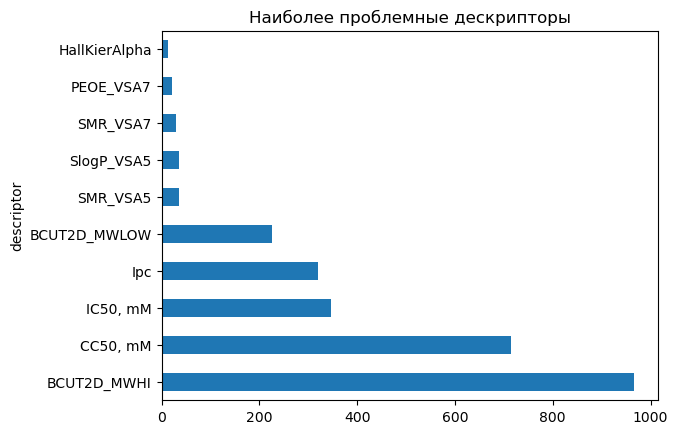

In [24]:
# –¢–æ–ø-10 –ø—Ä–æ–±–ª–µ–º–Ω—ã—Ö –¥–µ—Å–∫—Ä–∏–ø—Ç–æ—Ä–æ–≤
errors['descriptor'].value_counts().head(10).plot(kind='barh')
plt.title('–ù–∞–∏–±–æ–ª–µ–µ –ø—Ä–æ–±–ª–µ–º–Ω—ã–µ –¥–µ—Å–∫—Ä–∏–ø—Ç–æ—Ä—ã')
plt.show()


–ï—Å—Ç—å –ø–æ–¥–æ–∑—Ä–µ–Ω–∏—è –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –æ—à–∏–±–æ–∫ –≤ –¥–∞–Ω–Ω—ã—Ö, –æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ –æ—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ —ç—Ç–æ—Ç –≤–æ–ø—Ä–æ—Å –º–µ—à–∞–µ—Ç –Ω–µ–ø–æ–Ω–∏–º–∞–Ω–∏–µ –ø—Ä–æ—Ü–µ—Å–æ–≤ –ø—Ä–æ–≤–æ–¥–∏–º—ã—Ö –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–π –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ –ª–µ–∫–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤.

In [26]:
def remove_highly_correlated_features(df, target_col, threshold=0.8):
    """
    –£–¥–∞–ª—è–µ—Ç –æ–¥–∏–Ω –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –≤—ã—Å–æ–∫–æ–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø–∞—Ä–∞—Ö, —Å–æ—Ö—Ä–∞–Ω—è—è –ø—Ä–∏–∑–Ω–∞–∫ —Å –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–æ–π 
    –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    ----------
    df : DataFrame
        –í—Ö–æ–¥–Ω–æ–π DataFrame —Å –¥–∞–Ω–Ω—ã–º–∏
    target_col : str
        –ù–∞–∑–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
    threshold : float, optional
        –ü–æ—Ä–æ–≥ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã—Å–æ–∫–∏—Ö –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 0.8)
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    -----------
    DataFrame —Å —É–¥–∞–ª–µ–Ω–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏
    """
    # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–ª–∏—á–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
    if target_col not in df.columns:
        raise ValueError(f"–¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è '{target_col}' –Ω–µ –Ω–∞–π–¥–µ–Ω–∞ –≤ DataFrame")
    
    # –í—ã—á–∏—Å–ª—è–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
    corr_matrix = df.corr(numeric_only=True)
    target_corrs = corr_matrix[target_col].abs().drop(target_col)
    
    # –ü–æ–ª—É—á–∞–µ–º –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ (–±–µ–∑ —Ü–µ–ª–µ–≤–æ–π)
    feature_corr = df.drop(columns=[target_col]).corr(numeric_only=True).abs()
    np.fill_diagonal(feature_corr.values, 0)  # –û–±–Ω—É–ª—è–µ–º –¥–∏–∞–≥–æ–Ω–∞–ª—å
    
    # –ù–∞—Ö–æ–¥–∏–º –ø–∞—Ä—ã —Å –≤—ã—Å–æ–∫–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π
    high_corr_pairs = (feature_corr > threshold).stack()
    high_corr_pairs = high_corr_pairs[high_corr_pairs].index
    
    # –°–æ–±–∏—Ä–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è
    to_drop = set()
    
    # –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –∫–∞–∂–¥—É—é –ø–∞—Ä—É
    for f1, f2 in high_corr_pairs:
        # –£–∂–µ –ø–æ–º–µ—á–µ–Ω –Ω–∞ —É–¥–∞–ª–µ–Ω–∏–µ - –ø—Ä–æ–ø—É—Å–∫–∞–µ–º
        if f1 in to_drop or f2 in to_drop:
            continue
            
        # –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
        corr_f1 = target_corrs.get(f1, 0)
        corr_f2 = target_corrs.get(f2, 0)
        
        # –£–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫ —Å –º–µ–Ω—å—à–µ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π —Å —Ü–µ–ª–µ–≤–æ–π
        if corr_f1 > corr_f2:
            to_drop.add(f2)
        else:
            to_drop.add(f1)
    
    # –£–¥–∞–ª—è–µ–º –≤—ã–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    df_reduced = df.drop(columns=to_drop)
    
    # –í—ã–≤–æ–¥–∏–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –ø—Ä–æ–¥–µ–ª–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ
    print(f"–£–¥–∞–ª–µ–Ω–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {len(to_drop)}")
    if to_drop:
        print("–£–¥–∞–ª–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:", ", ".join(sorted(to_drop)))
    
    return df_reduced

In [27]:
# –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —É –Ω–∞—Å –µ—Å—Ç—å DataFrame —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π 'IC50, mM'
df_reduced = remove_highly_correlated_features(df, target_col='IC50, mM', threshold=0.85)

# –¢–µ–ø–µ—Ä—å df_reduced —Å–æ–¥–µ—Ä–∂–∏—Ç —Ç–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ –±–µ–∑ –≤—ã—Å–æ–∫–æ–π –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏
print(f"–ò—Å—Ö–æ–¥–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {len(df.columns)}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è: {len(df_reduced.columns)}")

–£–¥–∞–ª–µ–Ω–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 53
–£–¥–∞–ª–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: BCUT2D_LOGPLOW, BCUT2D_MWHI, BertzCT, Chi0, Chi0n, Chi0v, Chi1, Chi1n, Chi1v, Chi2v, Chi3n, Chi3v, Chi4n, Chi4v, EState_VSA1, ExactMolWt, FpDensityMorgan2, HallKierAlpha, HeavyAtomCount, HeavyAtomMolWt, Kappa1, Kappa2, LabuteASA, MaxAbsEStateIndex, MinAbsPartialCharge, MinPartialCharge, MolWt, NOCount, NumAromaticCarbocycles, NumAromaticRings, NumHAcceptors, NumHDonors, NumSaturatedCarbocycles, NumValenceElectrons, SMR_VSA1, SMR_VSA4, SMR_VSA5, SMR_VSA7, SMR_VSA9, SlogP_VSA4, SlogP_VSA6, TPSA, VSA_EState2, VSA_EState3, VSA_EState6, fr_Al_OH_noTert, fr_Ar_NH, fr_Ar_OH, fr_COO, fr_COO2, fr_C_O_noCOO, fr_nitro_arom_nonortho, fr_phenol
–ò—Å—Ö–æ–¥–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 213
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è: 160


In [28]:
# –í—ã–¥–µ–ª—è–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏ –¥–∞–Ω–Ω—ã–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
X = df.drop(['IC50, mM', 'CC50, mM', 'SI'], axis=1)  # –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫—Ä–æ–º–µ —Ü–µ–ª–µ–≤—ã—Ö
y = df['IC50, mM']


–í—ã–±–∏—Ä–∞–µ–º –º–æ–¥–µ–ª—å –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ "–†–µ–≥—Ä–µ—Å—Å–∏—è –¥–ª—è IC50"

üîç –û–±—É—á–µ–Ω–∏–µ Linear Regression...
 Linear Regression
R¬≤: 0.1413 | –í—Ä–µ–º—è: 0.03s | Scaler: StandardScaler
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üîç –û–±—É—á–µ–Ω–∏–µ Ridge (L2)...
 Ridge (L2)
R¬≤: 0.2307 | –í—Ä–µ–º—è: 0.01s | Scaler: StandardScaler
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üîç –û–±—É—á–µ–Ω–∏–µ Lasso (L1)...
 Lasso (L1)
R¬≤: 0.2206 | –í—Ä–µ–º—è: 0.07s | Scaler: StandardScaler
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üîç –û–±—É—á–µ–Ω–∏–µ ElasticNet...
 ElasticNet
R¬≤: 0.3432 | –í—Ä–µ–º—è: 0.07s | Scaler: StandardScaler
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

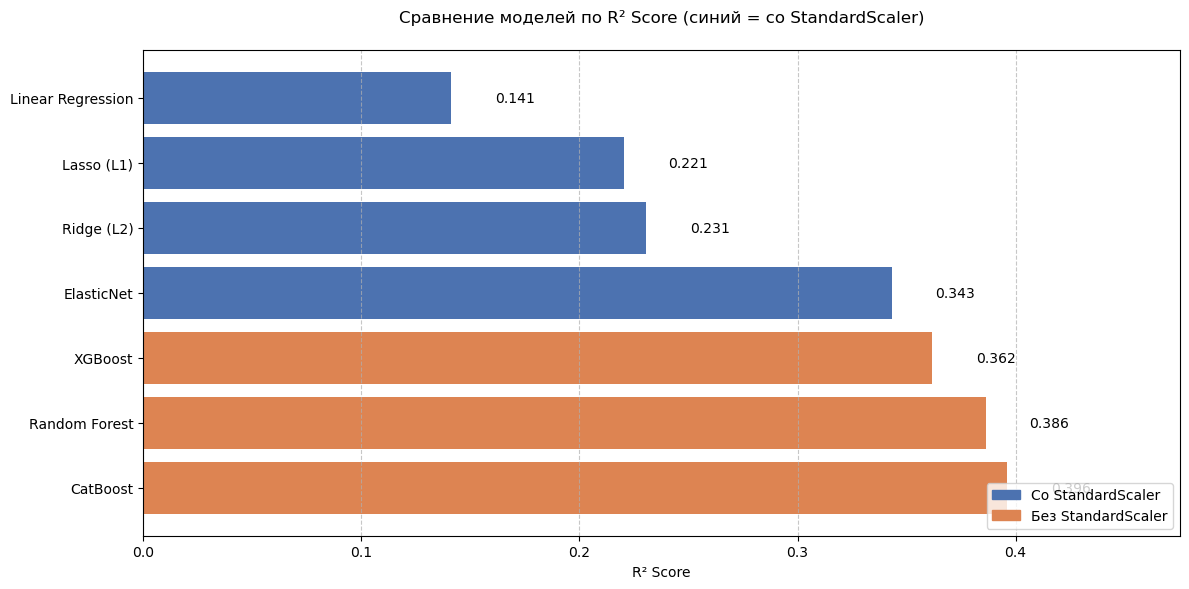

In [30]:
def test_regression_models_with_scaling(X, y, test_size=0.2, random_state=42, verbose=True):
    """
    –¢–µ—Å—Ç–∏—Ä—É–µ—Ç —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ —Å–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏–µ–π –¥–∞–Ω–Ω—ã—Ö –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã R¬≤.
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    ----------
    X : pd.DataFrame –∏–ª–∏ np.array
        –ú–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    y : pd.Series –∏–ª–∏ np.array
        –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
    test_size : float, optional
        –†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 0.2)
    random_state : int, optional
        Seed –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 42)
    verbose : bool, optional
        –í—ã–≤–æ–¥–∏—Ç—å –ª–∏ –ø—Ä–æ–≥—Ä–µ—Å—Å (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é True)
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    -----------
    pd.DataFrame
        –¢–∞–±–ª–∏—Ü–∞ —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ R¬≤ –∏ –≤—Ä–µ–º–µ–Ω–µ–º –æ–±—É—á–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏
    """
    
    # –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–µ–π —Å –ø–∞–π–ø–ª–∞–π–Ω–∞–º–∏ (StandardScaler + –º–æ–¥–µ–ª—å)
    models = {
        'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
        'Ridge (L2)': make_pipeline(StandardScaler(), 
                                   Ridge(alpha=1.0, random_state=random_state)),
        'Lasso (L1)': make_pipeline(StandardScaler(), 
                                   Lasso(alpha=0.1, random_state=random_state)),
        'ElasticNet': make_pipeline(StandardScaler(), 
                                   ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=random_state)),
        'Random Forest': RandomForestRegressor(random_state=random_state, n_jobs=-1),
        'XGBoost': XGBRegressor(random_state=random_state, n_jobs=-1),
        'CatBoost': CatBoostRegressor(random_state=random_state, verbose=False)
    }
    
    # –°–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    results = {
        'Model': [],
        'R2 Score': [],
        'Train Time (s)': [],
        'Scaler Used': []
    }
    
    # –û–±—É—á–µ–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–µ–π
    for name, model in models.items():
        if verbose:
            print(f"üîç –û–±—É—á–µ–Ω–∏–µ {name}...")
        
        try:
            start_time = time.time()
            
            # –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
            model.fit(X_train, y_train)
            train_time = time.time() - start_time
            
            # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
            y_pred = model.predict(X_test)
            
            # –†–∞—Å—á–µ—Ç R¬≤
            r2 = r2_score(y_test, y_pred)
            
            # –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è StandardScaler
            scaler_used = 'StandardScaler' if 'standardscaler' in str(model).lower() else 'No'
            
            # –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
            results['Model'].append(name)
            results['R2 Score'].append(r2)
            results['Train Time (s)'].append(train_time)
            results['Scaler Used'].append(scaler_used)
            
            if verbose:
                print(f" {name}\nR¬≤: {r2:.4f} | –í—Ä–µ–º—è: {train_time:.2f}s | Scaler: {scaler_used}")
                print("‚îÄ" * 50)
                
        except Exception as e:
            print(f" –û—à–∏–±–∫–∞ –≤ {name}: {str(e)}")
            continue
    
    # –°–æ–∑–¥–∞–Ω–∏–µ DataFrame —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
    results_df = pd.DataFrame(results).sort_values('R2 Score', ascending=False)
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    if verbose:
        plt.figure(figsize=(12, 6))
        colors = ['#4C72B0' if x == 'StandardScaler' else '#DD8452' for x in results_df['Scaler Used']]
        bars = plt.barh(results_df['Model'], results_df['R2 Score'], color=colors)
        
        # –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ –≥—Ä–∞—Ñ–∏–∫
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
                    f'{width:.3f}',
                    va='center', ha='left')
        
        plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ R¬≤ Score (—Å–∏–Ω–∏–π = —Å–æ StandardScaler)', pad=20)
        plt.xlabel('R¬≤ Score')
        plt.xlim(0, min(1.1, max(results_df['R2 Score']) * 1.2))
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        
        # –õ–µ–≥–µ–Ω–¥–∞
        import matplotlib.patches as mpatches
        blue_patch = mpatches.Patch(color='#4C72B0', label='–°–æ StandardScaler')
        orange_patch = mpatches.Patch(color='#DD8452', label='–ë–µ–∑ StandardScaler')
        plt.legend(handles=[blue_patch, orange_patch], loc='lower right')
        
        plt.tight_layout()
        plt.show()
    
    return results_df

# –ó–∞–ø—É—Å–∫ —Ä–∞—Å—á–µ—Ç–∞
results = test_regression_models_with_scaling(X, y)

–ú–æ–¥–µ–ª—å Catboost –ø–æ–∫–∞–∑–∞–ª–∞ –Ω–∞–∏–ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, –±–æ–ª–µ–µ —Ç–æ–≥–æ –Ω–∏–∑–∫–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≥–æ–≤–æ—Ä–∏—Ç –æ –Ω–∞–ª–∏—á–∏–∏–∏ –Ω–µ–ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏.

–ü–æ–¥–±–∏—Ä–∞–µ–º –Ω–∞–∏–±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (–Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö)

In [65]:
# –ò—â–µ–º –Ω–∞–∏–ª—É—á—à–∏–π –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è
def evaluate_model(X, y, model, name, test_size=0.2, random_state=42):
    """
    –û—Ü–µ–Ω–∏–≤–∞–µ—Ç –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö.
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    ----------
    X : pandas.DataFrame –∏–ª–∏ numpy.ndarray
        –ú–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    y : pandas.Series –∏–ª–∏ numpy.ndarray
        –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
    model : –æ–±—ä–µ–∫—Ç –º–æ–¥–µ–ª–∏ sklearn
        –ú–æ–¥–µ–ª—å –¥–ª—è –æ—Ü–µ–Ω–∫–∏
    test_size : float, optional
        –î–æ–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 0.2)
    random_state : int, optional
        Seed –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 42)
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    -----------
    float
        R2 score –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    """
    # –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
    models = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1),
        'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
        'CatBoost': CatBoostRegressor(iterations=100, random_seed=42, verbose=False)
    }
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2,
        random_state=42
    )
    
    
    if (name == 'LinearRegression') | (name == 'Ridge') | (name == 'Lasso') | (name == 'ElasticNet'):
        model = make_pipeline(StandardScaler(), models[name])
        
    else:
        model = models[name]
    # –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # –í–æ–∑–≤—Ä–∞—â–∞–µ–º R2 score
    return r2_score(y_test, y_pred)

def find_best_feature_subset(X, y, model, name):
    """
    –ù–∞—Ö–æ–¥–∏—Ç –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ–¥–Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –º–æ–¥–µ–ª–∏ –º–µ—Ç–æ–¥–æ–º –æ–±—Ä–∞—Ç–Ω–æ–≥–æ –∏—Å–∫–ª—é—á–µ–Ω–∏—è.
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    ----------
    X : pandas.DataFrame –∏–ª–∏ numpy.ndarray
        –ú–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    y : pandas.Series –∏–ª–∏ numpy.ndarray
        –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
    model : –æ–±—ä–µ–∫—Ç –º–æ–¥–µ–ª–∏ sklearn
        –ú–æ–¥–µ–ª—å –¥–ª—è –æ—Ü–µ–Ω–∫–∏
    model_name : str
        –ù–∞–∑–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ (–¥–ª—è –ª–æ–≥–æ–≤)
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    -----------
    dict
        –°–ª–æ–≤–∞—Ä—å —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏:
        - model: –Ω–∞–∑–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏
        - best_r2: –ª—É—á—à–∏–π R2 score
        - best_features: —Å–ø–∏—Å–æ–∫ –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
        - num_features: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
        - selector: –º–µ—Ç–æ–¥ –æ—Ç–±–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    """
    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ numpy array –≤ DataFrame –ø—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)
    
    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
    current_features = X.columns.tolist()  # –¢–µ–∫—É—â–∏–π –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    best_r2 = evaluate_model(X[current_features], y, model, name)  # –ù–∞—á–∞–ª—å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞
    best_features = current_features.copy()  # –õ—É—á—à–∏–π –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    history = []  # –ò—Å—Ç–æ—Ä–∏—è –∏–∑–º–µ–Ω–µ–Ω–∏–π
    
    # –ó–∞–ø–∏—Å—å –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è
    history.append({
        'features': current_features.copy(),
        'r2': best_r2,
        'action': 'initial'
    })
    
    # –í—ã–≤–æ–¥ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –Ω–∞—á–∞–ª—å–Ω–æ–π –æ—Ü–µ–Ω–∫–µ
    print(f"\n=== {name} ===")
    print(f"Initial R2: {best_r2:.4f} with {len(current_features)} features")
    
    # –û—Å–Ω–æ–≤–Ω–æ–π —Ü–∏–∫–ª –∏—Å–∫–ª—é—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    improved = True
    while improved and len(current_features) > 1:
        improved = False
        worst_feature = None
        
        # –ü–µ—Ä–µ–±–∏—Ä–∞–µ–º –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –ø–æ–∏—Å–∫–∞ –Ω–∞–∏–º–µ–Ω–µ–µ –∑–Ω–∞—á–∏–º–æ–≥–æ
        for feature in current_features:
            # –ü—Ä–æ–±—É–µ–º –∏—Å–∫–ª—é—á–∏—Ç—å —Ç–µ–∫—É—â–∏–π –ø—Ä–∏–∑–Ω–∞–∫
            trial_features = [f for f in current_features if f != feature]
            current_r2 = evaluate_model(X[trial_features], y, model, name)
            
            # –ó–∞–ø–∏—Å—å –≤ –∏—Å—Ç–æ—Ä–∏—é
            history.append({
                'features': trial_features.copy(),
                'r2': current_r2,
                'action': f'removed {feature}'
            })
            
            # –ï—Å–ª–∏ –∫–∞—á–µ—Å—Ç–≤–æ —É–ª—É—á—à–∏–ª–æ—Å—å, –æ–±–Ω–æ–≤–ª—è–µ–º –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç
            if current_r2 > best_r2:
                best_r2 = current_r2
                best_features = trial_features.copy()
                worst_feature = feature
                improved = True
        
        # –ï—Å–ª–∏ —É–ª—É—á—à–µ–Ω–∏–µ –±—ã–ª–æ, –∏—Å–∫–ª—é—á–∞–µ–º —Ö—É–¥—à–∏–π –ø—Ä–∏–∑–Ω–∞–∫
        if improved:
            current_features.remove(worst_feature)
    
    # –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    print(f"Best R2: {best_r2:.4f} with {len(best_features)} features")
    print("Optimal features:", best_features)
    
    # –í–æ–∑–≤—Ä–∞—â–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞–Ω–Ω–æ–º –≤–∏–¥–µ
    return {
        'model': name,
        'best_r2': best_r2,
        'best_features': best_features,
        'num_features': len(best_features),
        'selector': 'without selection'
    }

def test_all_models(X, y):
    """
    –¢–µ—Å—Ç–∏—Ä—É–µ—Ç –≤—Å–µ –º–æ–¥–µ–ª–∏ –∏–∑ –ø—Ä–µ–¥–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ —Å–ø–∏—Å–∫–∞.
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    ----------
    X : pandas.DataFrame –∏–ª–∏ numpy.ndarray
        –ú–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    y : pandas.Series –∏–ª–∏ numpy.ndarray
        –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    -----------
    pandas.DataFrame
        DataFrame —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –¥–ª—è –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π
    """
    # –°–ø–∏—Å–æ–∫ —Ç–µ—Å—Ç–∏—Ä—É–µ–º—ã—Ö –º–æ–¥–µ–ª–µ–π —Å –±–∞–∑–æ–≤—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
    models = [
        ('LinearRegression', LinearRegression()),
        ('Ridge', Ridge(alpha=1.0)),
        ('Lasso', Lasso(alpha=0.1)),
        ('ElasticNet', ElasticNet(alpha=0.1, l1_ratio=0.5)),
        ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('XGBoost', XGBRegressor(random_state=42)),
        ('CatBoost', CatBoostRegressor(silent=True, random_state=42))
    ]
    
    results = []  # –°–ø–∏—Å–æ–∫ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    
    # –¢–µ—Å—Ç–∏—Ä—É–µ–º –∫–∞–∂–¥—É—é –º–æ–¥–µ–ª—å
    for name, model in models:
        try:
            # –ù–∞—Ö–æ–¥–∏–º –ª—É—á—à–∏–π –ø–æ–¥–Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –º–æ–¥–µ–ª–∏
            result = find_best_feature_subset(X, y, model, name)
            results.append(result)
        except Exception as e:
            # –í —Å–ª—É—á–∞–µ –æ—à–∏–±–∫–∏ –≤—ã–≤–æ–¥–∏–º —Å–æ–æ–±—â–µ–Ω–∏–µ –∏ –ø—Ä–æ–¥–æ–ª–∂–∞–µ–º
            print(f"Error with {name}: {str(e)}")
            continue
    
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

# –ó–∞–ø—É—Å–∫ —Ä–∞—Å—á–µ—Ç–∞:
results_col_combination = test_all_models(X, y)


=== LinearRegression ===
Initial R2: 0.1413 with 210 features
Best R2: 0.5529 with 134 features
Optimal features: ['MinAbsEStateIndex', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'BCUT2D_LOGPHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BertzCT', 'Chi0', 'Chi0v', 'Chi1n', 'Chi1v', 'Chi3n', 'HallKierAlpha', 'Kappa2', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA11', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA9', 'EState_VSA1', 'EState_VSA10', 'EState_VSA3', 'EState_VSA6', 'EState_VSA8', 'VSA_EState1', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7', 'VSA_EState8',

In [50]:
# –ò—â–µ–º –Ω–∞–∏–ª—É—á—à–∏–π –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è, —á–µ—Ä–µ–∑ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–µ —É–¥–∞–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —É–ø–æ—Ä—è–¥–æ—á–µ–Ω–Ω—ã—Ö –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –≤–æ–∑–º–æ–∂–Ω—ã—Ö –≤—ã–±—Ä–æ—Å–æ–≤

outliers_count = pd.DataFrame({
        'feature': df.columns,
        'outliers': outliers.sum(axis=0)
    }).sort_values('outliers', ascending=False)
all_features_outliers = outliers_count['feature'][outliers_count['outliers']>0].tolist()
all_features_outliers.remove('IC50, mM')
all_features_outliers.remove('SI')
all_features_outliers.remove('CC50, mM')

def test_all_models(X, y):
    """–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –ø–æ –æ—á–µ—Ä–µ–¥–∏"""
    # –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª–∏ —Å –¥–µ—Ñ–æ–ª—Ç–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
    models = [
        ('LinearRegression', LinearRegression()),
        ('Ridge', Ridge(alpha=1.0)),
        ('Lasso', Lasso(alpha=0.1)),
        ('ElasticNet', ElasticNet(alpha=0.1, l1_ratio=0.5)),
        ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('XGBoost', XGBRegressor(random_state=42)),
        ('CatBoost', CatBoostRegressor(silent=True, random_state=42))
    ]
    
    results = []
    
    for name, model in models:
        try:
            result = get_features(X, y, name)
            results.append(result)
        except Exception as e:
            print(f"Error with {name}: {str(e)}")
            continue
    
    # –°–æ–∑–¥–∞–µ–º DataFrame —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
    results_df = pd.DataFrame(results)
    
    
    return results_df
def get_features(X, y, name):
    """
    –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é RandomForest —Å –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–µ–π –ø–æ R2
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    - best_features: —Å–ø–∏—Å–æ–∫ –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    - best_r2: –ª—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ R2
    - all_features: –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏
    """
    
    
    # –ù–∞—Ö–æ–¥–∏–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    best_r2 = -np.inf
    best_features = []
    
    for n in range(1, len(all_features_outliers)+1):
        
        current_features = X.drop(columns = all_features_outliers[:n]).columns.tolist()
        
        current_r2 = evaluate_r2(X[current_features], y, name)
        if current_r2 > best_r2:
            best_r2 = current_r2
            best_features = current_features.copy()
    
    print(f"\n=== {name} ===\n")
    print(f"Best R2: {best_r2:.4f} with {len(best_features)} features")
    print("Optimal features:", best_features)
    return {
        'model': name,
        'best_r2': best_r2,
        'best_features': best_features,
        'num_features': len(best_features),
        'selector': 'outliers'
    }
def evaluate_r2(X, y, name):
    """
    –í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ R2
    """
    models = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1),
        'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
        'CatBoost': CatBoostRegressor(iterations=100, random_seed=42, verbose=False)
    }
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2,
        random_state=42
    )
    
    
    if (name == 'LinearRegression') | (name == 'Ridge') | (name == 'Lasso') | (name == 'ElasticNet'):
        model = make_pipeline(StandardScaler(), models[name])
        
    else:
        model = models[name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return r2_score(y_test, y_pred)
    
# –ó–∞–ø—É—Å–∫ —Ä–∞—Å—á–µ—Ç–∞
results_col_combination_2 = test_all_models(X, y)


=== LinearRegression ===

Best R2: 0.3395 with 103 features
Optimal features: ['MinAbsEStateIndex', 'qed', 'SPS', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'AvgIpc', 'Chi2v', 'HallKierAlpha', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA6', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA7', 'SMR_VSA8', 'SlogP_VSA1', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA4', 'SlogP_VSA6', 'SlogP_VSA9', 'TPSA', 'EState_VSA11', 'EState_VSA4', 'EState_VSA6', 'EState_VSA8', 'VSA_EState2', 'VSA_EState4', 'VSA_EState6', 'VSA_EState7', 'FractionCSP3', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHDonors', 'NumHeteroatoms', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'N

In [51]:
# –ò—â–µ–º –Ω–∞–∏–ª—É—á—à–∏–π –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —É—á–µ—Ç–æ–º –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é SHAP

def test_tree_models_sh(X, y):
    """–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –ø–æ –æ—á–µ—Ä–µ–¥–∏"""
    # –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª–∏ —Å –¥–µ—Ñ–æ–ª—Ç–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
    models = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
        "CatBoost": CatBoostRegressor(silent=True, random_state=42),
    }
    
    results = []
    
    for name, model in models.items():
        try:
            result = get_shap_selection(X, y, name)
            results.append(result)
        except Exception as e:
            print(f"Error with {name}: {str(e)}")
            continue
    
    # –°–æ–∑–¥–∞–µ–º DataFrame —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
    results_df = pd.DataFrame(results)
    
    
    return results_df
def get_shap_selection(X, y, name):
    """
    –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é RandomForest —Å –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–µ–π –ø–æ R2
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    - best_features: —Å–ø–∏—Å–æ–∫ –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    - best_r2: –ª—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ R2
    - all_features: –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏
    """
    feature_names = X.columns.tolist()
    if name == 'RandomForest':
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)
        explainer = shap.Explainer(model)
        shap_values = explainer(X)
        importance = get_significant_shap_features(shap_values, feature_names)
    elif name == 'XGBoost':
        model = XGBRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)
        explainer = shap.Explainer(model)
        shap_values = explainer(X)
        importance = get_significant_shap_features(shap_values, feature_names)
    elif name == 'CatBoost':
        model = CatBoostRegressor(
        iterations=100,
        random_seed=42,
        verbose=False
        )
        model.fit(X, y)
        explainer = shap.Explainer(model)
        shap_values = explainer(X)
        importance = get_significant_shap_features(shap_values, feature_names)
   
    feat_importance = pd.DataFrame({
        'feature': importance['feature'],
        'importance': importance['mean_abs_shap']
    }).sort_values('importance', ascending=False)
    
    all_features = feat_importance['feature'][feat_importance['importance']>0].tolist()
    # –ù–∞—Ö–æ–¥–∏–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    best_r2 = -np.inf
    best_features = []
    
    for n in range(1, len(all_features)+1):
        
        current_features = all_features[:n]
        current_r2 = evaluate_r2_feature_selection(X[current_features], y, name)
        if current_r2 > best_r2:
            best_r2 = current_r2
            best_features = current_features.copy()
    print(f"\n=== {name} ===\n")
    print(f"Best R2: {best_r2:.4f} with {len(best_features)} features")
    print("Optimal features:", best_features)
    return {
        'model': name,
        'best_r2': best_r2,
        'best_features': best_features,
        'num_features': len(best_features),
        'selector': 'shap_selection'
    }

def evaluate_r2_feature_selection(X, y, model, test_size=0.2, random_state=42):
    """
    –í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ R2
    """
    models = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
        "CatBoost": CatBoostRegressor(silent=True, random_state=42),
    }
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state
    )
    
    model = models[model]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return r2_score(y_test, y_pred)
def get_significant_shap_features(shap_values, feature_names, threshold=0):
    """
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –ø–æ —É–±—ã–≤–∞–Ω–∏—é —Å–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å SHAP-–∑–Ω–∞—á–∏–º–æ—Å—Ç—å—é –≤—ã—à–µ threshold
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    ----------
    shap_values : shap.Explanation –∏–ª–∏ np.ndarray
        SHAP –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –≤—Å–µ—Ö –Ω–∞–±–ª—é–¥–µ–Ω–∏–π
    feature_names : list –∏–ª–∏ pd.Index
        –°–ø–∏—Å–æ–∫ –Ω–∞–∑–≤–∞–Ω–∏–π –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    threshold : float, optional
        –ü–æ—Ä–æ–≥ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 0)
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    -----------
    pd.DataFrame: DataFrame —Å –∫–æ–ª–æ–Ω–∫–∞–º–∏ 'feature' –∏ 'mean_abs_shap',
                  –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –ø–æ —É–±—ã–≤–∞–Ω–∏—é –≤–∞–∂–Ω–æ—Å—Ç–∏
    """
    # –ï—Å–ª–∏ –ø–µ—Ä–µ–¥–∞–Ω –æ–±—ä–µ–∫—Ç Explanation
    if isinstance(shap_values, shap.Explanation):
        shap_array = shap_values.values
    else:
        shap_array = shap_values
    
    # –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º —Å—Ä–µ–¥–Ω—é—é –∞–±—Å–æ–ª—é—Ç–Ω—É—é –≤–∞–∂–Ω–æ—Å—Ç—å –ø–æ –≤—Å–µ–º –Ω–∞–±–ª—é–¥–µ–Ω–∏—è–º
    mean_abs_shap = np.abs(shap_array).mean(axis=0)
    
    # –°–æ–∑–¥–∞–µ–º DataFrame
    shap_importance = pd.DataFrame({
        'feature': feature_names,
        'mean_abs_shap': mean_abs_shap
    })
    
    # –§–∏–ª—å—Ç—Ä—É–µ–º –ø–æ –ø–æ—Ä–æ–≥—É –∏ —Å–æ—Ä—Ç–∏—Ä—É–µ–º
    significant_features = shap_importance[shap_importance['mean_abs_shap'] > threshold] \
        .sort_values('mean_abs_shap', ascending=False)
    
    return significant_features.reset_index(drop=True)

# –ó–∞–ø—É—Å–∫ —Ä–∞—Å—á–µ—Ç–∞
results_col_combination_3 = test_tree_models_sh(X, y)


=== RandomForest ===

Best R2: 0.4379 with 15 features
Optimal features: ['VSA_EState4', 'FpDensityMorgan3', 'EState_VSA5', 'BCUT2D_MRLOW', 'Chi1n', 'BCUT2D_MWLOW', 'Chi2v', 'VSA_EState8', 'NHOHCount', 'EState_VSA8', 'NumSaturatedHeterocycles', 'SlogP_VSA5', 'qed', 'VSA_EState1', 'EState_VSA7']

=== XGBoost ===

Best R2: 0.5320 with 18 features
Optimal features: ['Chi2v', 'VSA_EState4', 'FpDensityMorgan3', 'BCUT2D_MRLOW', 'BCUT2D_MWLOW', 'EState_VSA5', 'EState_VSA3', 'Chi1v', 'VSA_EState8', 'qed', 'VSA_EState2', 'NumSaturatedHeterocycles', 'PEOE_VSA6', 'Chi4n', 'BCUT2D_MWHI', 'EState_VSA2', 'NHOHCount', 'MinAbsEStateIndex']

=== CatBoost ===

Best R2: 0.4299 with 81 features
Optimal features: ['VSA_EState4', 'EState_VSA5', 'Chi2n', 'FpDensityMorgan3', 'BCUT2D_MRLOW', 'MolLogP', 'HeavyAtomMolWt', 'FpDensityMorgan1', 'VSA_EState1', 'EState_VSA7', 'PEOE_VSA9', 'BCUT2D_MWHI', 'Chi1n', 'VSA_EState7', 'VSA_EState5', 'qed', 'Chi3v', 'PEOE_VSA6', 'BalabanJ', 'EState_VSA8', 'Chi4v', 'EState_VS

In [52]:
# –ò—â–µ–º –Ω–∞–∏–ª—É—á—à–∏–π –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —É—á–µ—Ç–æ–º –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é features importance

def test_tree_models_fs(X, y):
    """–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –ø–æ –æ—á–µ—Ä–µ–¥–∏"""
    # –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª–∏ —Å –¥–µ—Ñ–æ–ª—Ç–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
    models = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
        "CatBoost": CatBoostRegressor(silent=True, random_state=42),
    }
    
    results = []
    
    for name, model in models.items():
        try:
            result = get_feature_selection(X, y, name)
            results.append(result)
        except Exception as e:
            print(f"Error with {name}: {str(e)}")
            continue
    
    # –°–æ–∑–¥–∞–µ–º DataFrame —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
    results_df = pd.DataFrame(results)
    
    
    return results_df
def get_feature_selection(X, y, name):
    """
    –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é RandomForest —Å –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–µ–π –ø–æ R2
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    - best_features: —Å–ø–∏—Å–æ–∫ –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    - best_r2: –ª—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ R2
    - all_features: –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏
    """
    feature_names = X.columns.tolist()
    if name == 'RandomForest':
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)
        
    elif name == 'XGBoost':
        model = XGBRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)
        
    elif name == 'CatBoost':
        model = CatBoostRegressor(
        iterations=100,
        random_seed=42,
        verbose=False
        )
        model.fit(X, y)
        
    importance = model.feature_importances_
    
    # –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏
    feat_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    all_features = feat_importance['feature'][feat_importance['importance']>0].tolist()
    # –ù–∞—Ö–æ–¥–∏–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    best_r2 = -np.inf
    best_features = []
    
    for n in range(1, len(all_features)+1):
        
        current_features = all_features[:n]
        current_r2 = evaluate_r2_feature_selection(X[current_features], y, name)
        if current_r2 > best_r2:
            best_r2 = current_r2
            best_features = current_features.copy()
    print(f"\n=== {name} ===\n")
    print(f"Best R2: {best_r2:.4f} with {len(best_features)} features")
    print("Optimal features:", best_features)
    return {
        'model': name,
        'best_r2': best_r2,
        'best_features': best_features,
        'num_features': len(best_features),
        'selector': 'feature_selection'
    }

def evaluate_r2_feature_selection(X, y, model, test_size=0.2, random_state=42):
    """
    –í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ R2
    """
    models = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
        "CatBoost": CatBoostRegressor(silent=True, random_state=42),
    }
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state
    )
    
    model = models[model]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return r2_score(y_test, y_pred)

# –ó–∞–ø—É—Å–∫ —Ä–∞—Å—á–µ—Ç–∞
results_col_combination_4 = test_tree_models_fs(X, y)


=== RandomForest ===

Best R2: 0.4671 with 2 features
Optimal features: ['BCUT2D_MWLOW', 'VSA_EState4']

=== XGBoost ===

Best R2: 0.5198 with 10 features
Optimal features: ['BCUT2D_MWLOW', 'Chi1v', 'fr_sulfonamd', 'fr_Al_OH', 'NumSaturatedHeterocycles', 'NHOHCount', 'SMR_VSA1', 'Chi2v', 'VSA_EState4', 'BCUT2D_MRLOW']

=== CatBoost ===

Best R2: 0.4746 with 2 features
Optimal features: ['VSA_EState4', 'BCUT2D_MWLOW']


In [67]:
# –û–±—ä–µ–¥–∏–Ω—è–µ–º –≤—Å–µ –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
results_df = pd.concat([results_col_combination,results_col_combination_2, results_col_combination_3, results_col_combination_4], ignore_index = True)

In [71]:
results_df

model   best_r2  \
0   LinearRegression  0.552945   
1              Ridge  0.612209   
2              Lasso  0.614452   
3         ElasticNet  0.517275   
4       RandomForest  0.449282   
5            XGBoost  0.504857   
6           CatBoost  0.474744   
7   LinearRegression  0.339510   
8              Ridge  0.347824   
9              Lasso  0.344370   
10        ElasticNet  0.383019   
11      RandomForest  0.518970   
12           XGBoost  0.511090   
13          CatBoost  0.530206   
14      RandomForest  0.437937   
15           XGBoost  0.532019   
16          CatBoost  0.429862   
17      RandomForest  0.467113   
18           XGBoost  0.519798   
19          CatBoost  0.474580   

                                        best_features  num_features  \
0   [MinAbsEStateIndex, SPS, MolWt, HeavyAtomMolWt...           134   
1   [MaxAbsEStateIndex, MaxEStateIndex, MinAbsESta...           114   
2   [MaxEStateIndex, MinAbsEStateIndex, SPS, Exact...           104   
3   [MinAbsEStateIndex, MolWt, HeavyAtomMolWt, Exa...           116   
4   [MaxAbsEStateIndex, MaxEStateIndex, MinAbsESta...           206   
5   [MaxAbsEStateIndex, MaxEStateIndex, MinAbsESta...           198   
6   [MaxAbsEStateIndex, MaxEStateIndex, MinAbsESta...           209   
7   [MinAbsEStateIndex, qed, SPS, NumRadicalElectr...           103   
8   [MinAbsEStateIndex, qed, SPS, NumRadicalElectr...           103   
9   [MinAbsEStateIndex, qed, SPS, NumRadicalElectr...           103   
10  [MaxAbsEStateIndex, MaxEStateIndex, MinAbsESta...           182   
11  [qed, SPS, NumRadicalElectrons, MaxPartialChar...            27   
12  [qed, SPS, NumRadicalElectrons, MaxPartialChar...            32   
13  [qed, SPS, NumRadicalElectrons, MaxPartialChar...            36   
14  [VSA_EState4, FpDensityMorgan3, EState_VSA5, B...            15   
15  [Chi2v, VSA_EState4, FpDensityMorgan3, BCUT2D_...            18   
16  [VSA_EState4, EState_VSA5, Chi2n, FpDensityMor...            81   
17                        [BCUT2D_MWLOW, VSA_EState4]             2   
18  [BCUT2D_MWLOW, Chi1v, fr_sulfonamd, fr_Al_OH, ...            10   
19                        [VSA_EState4, BCUT2D_MWLOW]             2   

             selector  
0   without selection  
1   without selection  
2   without selection  
3   without selection  
4   without selection  
5   without selection  
6   without selection  
7            outliers  
8            outliers  
9            outliers  
10           outliers  
11           outliers  
12           outliers  
13           outliers  
14     shap_selection  
15     shap_selection  
16     shap_selection  
17  feature_selection  
18  feature_selection  
19  feature_selection

In [73]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –Ω–∞–ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–µ–π
def test_all_models(X, y):
    """–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –ø–æ –æ—á–µ—Ä–µ–¥–∏"""
    # –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª–∏ —Å –¥–µ—Ñ–æ–ª—Ç–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
    models = [
        ('LinearRegression', LinearRegression()),
        ('Ridge', Ridge(alpha=1.0)),
        ('Lasso', Lasso(alpha=0.1)),
        ('ElasticNet', ElasticNet(alpha=0.1, l1_ratio=0.5)),
        ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('XGBoost', XGBRegressor(random_state=42)),
        ('CatBoost', CatBoostRegressor(silent=True, random_state=42))
    ]
    
    results = []
    
    for name, model in models:
        try:
            result = get_res_features(X, y, name)
            results.append(result)
        except Exception as e:
            print(f"Error with {name}: {str(e)}")
            continue
    
    # –°–æ–∑–¥–∞–µ–º DataFrame —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
    results_df = pd.DataFrame(results)
    
    
    return results_df
def get_res_features(X, y, name):
    """
    –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é RandomForest —Å –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–µ–π –ø–æ R2
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    - best_features: —Å–ø–∏—Å–æ–∫ –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    - best_r2: –ª—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ R2
    - all_features: –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏
    """
    
    
    # –ù–∞—Ö–æ–¥–∏–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    best_r2 = -np.inf
    best_features = []
    res_features = results_df['best_features'].tolist()
    for current_features in res_features:
        
        current_r2 = evaluate_r2(X[current_features], y, name)
        if current_r2 > best_r2:
            best_r2 = current_r2
            best_features = current_features.copy()
    
    print(f"\n=== {name} ===\n")
    print(f"Best R2: {best_r2:.4f} with {len(best_features)} features")
    print("Optimal features:", best_features)
    return {
        'model': name,
        'best_r2': best_r2,
        'best_features': best_features,
        'num_features': len(best_features),
        
    }
def evaluate_r2(X, y, name):
    """
    –í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ R2
    """
    models = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1),
        'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
        'CatBoost': CatBoostRegressor(iterations=100, random_seed=42, verbose=False)
    }
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2,
        random_state=42
    )
    if (name == 'LinearRegression') | (name == 'Ridge') | (name == 'Lasso') | (name == 'ElasticNet'):
        model = make_pipeline(StandardScaler(), models[name])
        
    else:
        model = models[name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return r2_score(y_test, y_pred)

# –ó–∞–ø—É—Å–∫ —Ä–∞—Å—á–µ—Ç–∞
results_features_selection = test_all_models(X, y)


=== LinearRegression ===

Best R2: 0.6242 with 114 features
Optimal features: ['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRLOW', 'AvgIpc', 'Chi0', 'Chi2n', 'Chi3n', 'Chi3v', 'Chi4n', 'HallKierAlpha', 'Kappa1', 'Kappa3', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA5', 'SMR_VSA7', 'SMR_VSA8', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA9', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA3', 'EState_VSA9', 'VSA_EState2', 'VSA_EState5', 'VSA_EState8', 'FractionCSP3', 'NHOHCount', 'NumAliphaticHeterocycles', 'NumSaturatedRing

In [77]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ª—É—á—à—É—é –∫–æ–º–±–∏–Ω–∞—Ü–∏—é —Å—Ç—Ä–æ–∫, —É—á–∏—Ç—ã–≤–∞—è —Å—Ç—Ä–æ–∫–∏ —Å –ø–æ–¥–æ–∑—Ä–µ–Ω–∏–µ–º –Ω–∞ –≤—ã–±—Ä–æ—Å—ã, –¥–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–µ–π

def test_outlier_strings(X, y,outliers):
    """–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –ø–æ –æ—á–µ—Ä–µ–¥–∏"""
    # –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª–∏ —Å –¥–µ—Ñ–æ–ª—Ç–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
    models = [
        ('LinearRegression', LinearRegression()),
        ('Ridge', Ridge(alpha=1.0)),
        ('Lasso', Lasso(alpha=0.1)),
        ('ElasticNet', ElasticNet(alpha=0.1, l1_ratio=0.5)),
        ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('XGBoost', XGBRegressor(random_state=42)),
        ('CatBoost', CatBoostRegressor(silent=True, random_state=42))
    ]
    
    results = []
    
    for name, model in models:
        try:
            result = optimize_outlier_removal(X, y, outliers,name, model)
            results.append(result)
        except Exception as e:
            print(f"Error with {name}: {str(e)}")
            continue
    
    # –°–æ–∑–¥–∞–µ–º DataFrame —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
    results_df = pd.DataFrame(results)
    
    
    return results_df
def optimize_outlier_removal(X, y, outliers,name, model=None):
    """
    –ü–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ —É–¥–∞–ª—è–µ—Ç —Å—Ç—Ä–æ–∫–∏ —Å –≤—ã–±—Ä–æ—Å–∞–º–∏ –∏ –ø—Ä–æ–≤–µ—Ä—è–µ—Ç –≤–ª–∏—è–Ω–∏–µ –Ω–∞ R¬≤
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    ----------
    df : pd.DataFrame
        –ò—Å—Ö–æ–¥–Ω—ã–π DataFrame —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏
    y : pd.Series
        –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
    outliers_df : pd.DataFrame
        DataFrame —Å —Ñ–ª–∞–≥–∞–º–∏ –≤—ã–±—Ä–æ—Å–æ–≤ (True - –≤—ã–±—Ä–æ—Å)
    model : sklearn –º–æ–¥–µ–ª—å, optional
        –ú–æ–¥–µ–ª—å –¥–ª—è –æ—Ü–µ–Ω–∫–∏ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é RandomForestRegressor)
    test_size : float, optional
        –†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
    random_state : int, optional
        Seed –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏
        
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    -----------
    pd.DataFrame: –û–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–π DataFrame –±–µ–∑ —É—Ö—É–¥—à–∞—é—â–∏—Ö –∫–∞—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤
    float: –õ—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ R¬≤
    """
    models = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1),
        'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
        'CatBoost': CatBoostRegressor(iterations=100, random_seed=42, verbose=False)
    }
    
    if name == 'LinearRegression':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][0]]
        
    elif name == 'Ridge':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][1]]
        
    elif name == 'Lasso':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][2]]
    elif name == 'ElasticNet':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][3]]
    elif name == 'RandomForest':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][4]]
    elif name == 'XGBoost':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][5]]
    elif name == 'CatBoost':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][6]]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42
    )
    
    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è
    X_opt = X_train.copy()
    y_opt = y_train.copy()
    best_r2 = -np.inf
    removed_indices = []
    # –ü–æ–ª—É—á–∞–µ–º –≤—Å–µ –≤—ã–±—Ä–æ—Å—ã
    
    train_outliers = outliers.loc[X_train.index]
    mask_outliers = ((outliers['SI']) | (outliers['IC50, mM'])| (outliers['CC50, mM']))
    clean_df = train_outliers[mask_outliers]

    for idx in clean_df.index.tolist():
        # –í—Ä–µ–º–µ–Ω–Ω–æ —É–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫—É
        X_temp = X_opt.drop(index=idx)
        y_temp = y_opt.drop(index=idx)
        
        # –û–±—É—á–∞–µ–º –∏ –æ—Ü–µ–Ω–∏–≤–∞–µ–º
        if (name == 'LinearRegression') | (name == 'Ridge') | (name == 'Lasso') | (name == 'ElasticNet'):
            model = make_pipeline(StandardScaler(), models[name])
        
        else:
            model = models[name]
        model.fit(X_temp, y_temp)
        y_pred = model.predict(X_test)
        current_r2 = r2_score(y_test, y_pred)
        
        # –†–µ—à–µ–Ω–∏–µ –æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–∏/—É–¥–∞–ª–µ–Ω–∏–∏ —Å—Ç—Ä–æ–∫–∏
        if current_r2 > best_r2:
            best_r2 = current_r2
            X_opt = X_temp
            y_opt = y_temp
            removed_indices.append(idx)
    
    print(f"\n=== {name} ===")
    print(f"\n–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: {best_r2:.4f}")
    print(f"–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: {len(removed_indices)} –∏–∑ {len(X_train)}")
    return {
        'model': name,
        'best_r2': best_r2,
        'removed_indices': removed_indices,
        'num_removed': len(removed_indices),
        'indices': X_opt.index,
        'selector': 'outlier_selection'
    }

# –ó–∞–ø—É—Å–∫ —Ä–∞—Å—á–µ—Ç–∞
results_ind_outliers = test_outlier_strings(X, y,outliers)   


=== LinearRegression ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.6756
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 102 –∏–∑ 772

=== Ridge ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.6680
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 90 –∏–∑ 772

=== Lasso ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.6739
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 105 –∏–∑ 772

=== ElasticNet ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.5880
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 102 –∏–∑ 772

=== RandomForest ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.5949
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 7 –∏–∑ 772

=== XGBoost ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.5849
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 10 –∏–∑ 772

=== CatBoost ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.5958
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 8 –∏–∑ 772


In [89]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ª—É—á—à—É—é –∫–æ–º–±–∏–Ω–∞—Ü–∏—é —Å—Ç—Ä–æ–∫ –¥–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–µ–π –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö
def test_all_models_strings(X, y):
    """–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –ø–æ –æ—á–µ—Ä–µ–¥–∏"""
    # –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª–∏ —Å –¥–µ—Ñ–æ–ª—Ç–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
    models = [
        ('LinearRegression', LinearRegression()),
        ('Ridge', Ridge(alpha=1.0)),
        ('Lasso', Lasso(alpha=0.1)),
        ('ElasticNet', ElasticNet(alpha=0.1, l1_ratio=0.5)),
        ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('XGBoost', XGBRegressor(random_state=42)),
        ('CatBoost', CatBoostRegressor(silent=True, random_state=42))
    ]
    
    results = []
    
    for name, model in models:
        try:
            result = optimize_training_set(X, y, name, model)
            results.append(result)
        except Exception as e:
            print(f"Error with {name}: {str(e)}")
            continue
    
    # –°–æ–∑–¥–∞–µ–º DataFrame —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
    results_df = pd.DataFrame(results)
    
    
    return results_df
def optimize_training_set(X, y, name, model, verbose=True):
    """
    –û–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ—Ç —Å–æ—Å—Ç–∞–≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø—É—Ç–µ–º –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–≥–æ —É–¥–∞–ª–µ–Ω–∏—è —Å—Ç—Ä–æ–∫.
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    ----------
    X_train, y_train: pd.DataFrame/pd.Series
        –û–±—É—á–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ
    X_test, y_test: pd.DataFrame/pd.Series
        –¢–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏
    model_params: dict
        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã XGBoost (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é: {'n_estimators': 100, 'random_state': 42})
    verbose: bool
        –í—ã–≤–æ–¥–∏—Ç—å –ª–∏ –ø—Ä–æ–≥—Ä–µ—Å—Å
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    -----------
    pd.Index: –ò–Ω–¥–µ–∫—Å—ã –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–∞ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö
    """
    models = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1),
        'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
        'CatBoost': CatBoostRegressor(iterations=100, random_seed=42, verbose=False)
    }
    if name == 'LinearRegression':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][0]]
        
    elif name == 'Ridge':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][1]]
        
    elif name == 'Lasso':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][2]]
    elif name == 'ElasticNet':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][3]]
    elif name == 'RandomForest':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][4]]
    elif name == 'XGBoost':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][5]]
    elif name == 'CatBoost':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][6]]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42
    )
    
    # –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏–∏ –¥–ª—è –±–µ–∑–æ–ø–∞—Å–Ω–æ–≥–æ —É–¥–∞–ª–µ–Ω–∏—è —Å—Ç—Ä–æ–∫
    X_opt = X_train.copy()
    y_opt = y_train.copy()
    best_r2 = -np.inf
    removed_indices = []
    
    for idx in X_train.index:
        # –í—Ä–µ–º–µ–Ω–Ω–æ —É–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫—É
        X_temp = X_opt.drop(index=idx)
        y_temp = y_opt.drop(index=idx)
        
        # –û–±—É—á–∞–µ–º –∏ –æ—Ü–µ–Ω–∏–≤–∞–µ–º
        if (name == 'LinearRegression') | (name == 'Ridge') | (name == 'Lasso') | (name == 'ElasticNet'):
            model = make_pipeline(StandardScaler(), models[name])
        
        else:
            model = models[name]
        model.fit(X_temp, y_temp)
        y_pred = model.predict(X_test)
        current_r2 = r2_score(y_test, y_pred)
        
        # –†–µ—à–µ–Ω–∏–µ –æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–∏/—É–¥–∞–ª–µ–Ω–∏–∏ —Å—Ç—Ä–æ–∫–∏
        if current_r2 > best_r2:
            best_r2 = current_r2
            X_opt = X_temp
            y_opt = y_temp
            removed_indices.append(idx)
            
    print(f"\n=== {name} ===")
    print(f"\n–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: {best_r2:.4f}")
    print(f"–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: {len(removed_indices)} –∏–∑ {len(X_train)}")
    return {
        'model': name,
        'best_r2': best_r2,
        'removed_indices': removed_indices,
        'num_removed': len(removed_indices),
        'indices': X_opt.index,
        'selector': 'without selection'
    }

# –ó–∞–ø—É—Å–∫ —Ä–∞—Å—á–µ—Ç–∞
results_ind_combination = test_all_models_strings(X, y)   


=== LinearRegression ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.7173
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 281 –∏–∑ 772

=== Ridge ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.7069
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 294 –∏–∑ 772

=== Lasso ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.7147
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 311 –∏–∑ 772

=== ElasticNet ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.6469
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 399 –∏–∑ 772

=== RandomForest ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.5570
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 11 –∏–∑ 772

=== XGBoost ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.5588
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 7 –∏–∑ 772

=== CatBoost ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.6029
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 15 –∏–∑ 772


In [90]:
# –û–±—ä–µ–¥–∏–Ω—è–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
results_indices_df = pd.concat([results_ind_outliers, results_ind_combination], ignore_index = True)

In [185]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –Ω–∞–ª—É—á—à—É—é –∫–æ–º–±–∏–Ω–∞—Ü–∏—é —Å—Ç—Ä–æ–∫ –¥–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–µ–π

def test_all_models_strings(X, y):
    """–¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –ø–æ –æ—á–µ—Ä–µ–¥–∏"""
    # –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª–∏ —Å –¥–µ—Ñ–æ–ª—Ç–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
    models = [
        ('LinearRegression', LinearRegression()),
        ('Ridge', Ridge(alpha=1.0)),
        ('Lasso', Lasso(alpha=0.1)),
        ('ElasticNet', ElasticNet(alpha=0.1, l1_ratio=0.5)),
        ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('XGBoost', XGBRegressor(random_state=42)),
        ('CatBoost', CatBoostRegressor(silent=True, random_state=42))
    ]
    
    results = []
    
    for name, model in models:
        try:
            result = optimize_training_set(X, y, name, model)
            results.append(result)
        except Exception as e:
            print(f"Error with {name}: {str(e)}")
            continue
    
    # –°–æ–∑–¥–∞–µ–º DataFrame —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏
    results_df = pd.DataFrame(results)
    
    
    return results_df
def optimize_training_set(X, y, name, model, verbose=True):
    """
    –û–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ—Ç —Å–æ—Å—Ç–∞–≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø—É—Ç–µ–º –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–≥–æ —É–¥–∞–ª–µ–Ω–∏—è —Å—Ç—Ä–æ–∫.
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    ----------
    X_train, y_train: pd.DataFrame/pd.Series
        –û–±—É—á–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ
    X_test, y_test: pd.DataFrame/pd.Series
        –¢–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏
    model_params: dict
        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã XGBoost (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é: {'n_estimators': 100, 'random_state': 42})
    verbose: bool
        –í—ã–≤–æ–¥–∏—Ç—å –ª–∏ –ø—Ä–æ–≥—Ä–µ—Å—Å
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    -----------
    pd.Index: –ò–Ω–¥–µ–∫—Å—ã –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–∞ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö
    """
    models = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1),
        'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
        'CatBoost': CatBoostRegressor(iterations=100, random_seed=42, verbose=False)
    }
    if name == 'LinearRegression':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][0]]
        
    elif name == 'Ridge':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][1]]
        
    elif name == 'Lasso':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][2]]
    elif name == 'ElasticNet':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][3]]
    elif name == 'RandomForest':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][4]]
    elif name == 'XGBoost':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][5]]
    elif name == 'CatBoost':
        X = X[results_features_selection[results_features_selection['model'] == name]['best_features'][6]]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42
    )
    
    # –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏–∏ –¥–ª—è –±–µ–∑–æ–ø–∞—Å–Ω–æ–≥–æ —É–¥–∞–ª–µ–Ω–∏—è —Å—Ç—Ä–æ–∫
    X_opt = X_train.copy()
    y_opt = y_train.copy()
    best_r2 = -np.inf
    
    removed_indices = results_indices_df['removed_indices'].tolist()
    
    for idx in removed_indices:
        
        # –í—Ä–µ–º–µ–Ω–Ω–æ —É–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫—É
        X_temp = X_train.drop(idx)
        y_temp = y_train.drop(idx)
        if (name == 'LinearRegression') | (name == 'Ridge') | (name == 'Lasso') | (name == 'ElasticNet'):
            model = make_pipeline(StandardScaler(), models[name])
        
        else:
            model = models[name]
        model.fit(X_temp, y_temp)
        y_pred = model.predict(X_test)
        current_r2 = r2_score(y_test, y_pred)
        # –†–µ—à–µ–Ω–∏–µ –æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–∏/—É–¥–∞–ª–µ–Ω–∏–∏ —Å—Ç—Ä–æ–∫–∏
        if current_r2 > best_r2:
            best_r2 = current_r2
            X_opt = X_temp
            y_opt = y_temp
            ind = idx
    
    print(f"\n=== {name} ===")
    print(f"\n–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: {best_r2:.4f}")
    print(f"–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: {len(ind)} –∏–∑ {len(X_train)}")
    return {
        'model': name,
        'best_r2': best_r2,
        'removed_indices': ind,
        'num_removed': len(ind),
        'indices': X_opt.index.tolist(),
        'selector': 'without selection'
    }
    
# –ó–∞–ø—É—Å–∫ —Ä–∞—Å—á–µ—Ç–∞
results_indices_selection = test_all_models_strings(X, y)   


=== LinearRegression ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.7173
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 281 –∏–∑ 772

=== Ridge ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.7069
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 294 –∏–∑ 772

=== Lasso ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.7147
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 311 –∏–∑ 772

=== ElasticNet ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.6469
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 399 –∏–∑ 772

=== RandomForest ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.6107
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 90 –∏–∑ 772

=== XGBoost ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.5849
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 10 –∏–∑ 772

=== CatBoost ===

–ò—Ç–æ–≥–æ–≤—ã–π R¬≤: 0.6029
–£–¥–∞–ª–µ–Ω–æ —Å—Ç—Ä–æ–∫: 15 –∏–∑ 772


In [92]:
results_indices_selection

model   best_r2  \
0  LinearRegression  0.717347   
1             Ridge  0.706903   
2             Lasso  0.714723   
3        ElasticNet  0.646920   
4      RandomForest  0.610674   
5           XGBoost  0.584862   
6          CatBoost  0.602851   

                                     removed_indices  num_removed  \
0  [740, 317, 309, 457, 77, 245, 390, 228, 329, 3...          281   
1  [740, 317, 309, 457, 77, 245, 390, 86, 228, 32...          294   
2  [740, 317, 309, 457, 77, 245, 390, 86, 228, 97...          311   
3  [740, 202, 317, 957, 309, 821, 457, 999, 77, 2...          399   
4  [202, 77, 245, 86, 109, 519, 526, 25, 950, 302...           90   
5  [202, 821, 77, 245, 344, 734, 512, 475, 774, 724]           10   
6  [740, 202, 317, 645, 866, 343, 28, 179, 183, 6...           15   

                                             indices           selector  
0  [202, 957, 821, 117, 999, 86, 344, 540, 976, 2...  without selection  
1  [202, 957, 821, 117, 999, 344, 540, 2, 367, 64...  without selection  
2  [202, 957, 821, 117, 999, 329, 344, 540, 2, 36...  without selection  
3  [117, 390, 344, 976, 367, 264, 218, 308, 866, ...  without selection  
4  [740, 317, 957, 309, 821, 457, 117, 999, 390, ...  without selection  
5  [740, 317, 957, 309, 457, 117, 999, 390, 86, 2...  without selection  
6  [957, 309, 821, 457, 117, 999, 77, 245, 390, 8...  without selection

In [163]:
# –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –ª–∏–Ω–µ–π–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π

def optimize_linear_model(X_train, X_test, y_train, y_test, model_type='ridge', n_trials=100, random_state=42, initial_params=None):
    """
    –û–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ—Ç –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è Ridge, Lasso –∏–ª–∏ ElasticNet —Å –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏—è–º–∏.
    """
    
    def objective(trial):
        try:
            alpha = trial.suggest_float('alpha', 1e-6, 100, log=True)
            
            if model_type == 'elasticnet':
                l1_ratio = trial.suggest_float('l1_ratio', 0.01, 0.99)
                model = make_pipeline(StandardScaler(),ElasticNet(alpha=alpha, l1_ratio=l1_ratio))
            elif model_type == 'lasso':
                model = make_pipeline(StandardScaler(),Lasso(alpha=alpha))
            else:  # ridge
                model = make_pipeline(StandardScaler(),Ridge(alpha=alpha))
            
            model.fit( X_train, y_train)
    
            # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
            y_pred = model.predict(X_test)
            
            # –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫
            #rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)
            
            # –°–æ—Ö—Ä–∞–Ω—è–µ–º R¬≤ –∫–∞–∫ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –∞—Ç—Ä–∏–±—É—Ç
            #trial.set_user_attr("r2", r2)
            
            return r2
            
        except Exception as e:
            print(f"–û—à–∏–±–∫–∞ –≤ trial: {e}")
            return -np.inf  # –í–æ–∑–≤—Ä–∞—â–∞–µ–º -inf –ø—Ä–∏ –æ—à–∏–±–∫–µ
    
    # –ù–∞—Å—Ç—Ä–æ–π–∫–∞ Optuna
    study = optuna.create_study(
        direction='maximize',
        sampler=optuna.samplers.TPESampler(seed=random_state),
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10)
    )
    if initial_params is not None:
        study.enqueue_trial(initial_params)
    study.optimize(objective, n_trials=n_trials, show_progress_bar=False)
    
    return {
        'best_params': study.best_params,
        'best_score': study.best_value,
        'study': study
    }
    

In [165]:

# –ó–∞–ø—É—Å–∫ –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_ridge = X_train[results_features_selection[results_features_selection['model'] == 'Ridge']['best_features'][1]].drop(results_indices_selection[results_indices_selection['model'] == 'Ridge']['removed_indices'][1])
y_train_ridge = y_train.drop(results_indices_selection[results_indices_selection['model'] == 'Ridge']['removed_indices'][1])
X_test_ridge = X_test[results_features_selection[results_features_selection['model'] == 'Ridge']['best_features'][1]]
ridge_results = optimize_linear_model(X_train_ridge, X_test_ridge, y_train_ridge, y_test, 'ridge', n_trials=500, initial_params = {'alpha': 1.0})

X_train_lasso = X_train[results_features_selection[results_features_selection['model'] == 'Lasso']['best_features'][2]].drop(results_indices_selection[results_indices_selection['model'] == 'Lasso']['removed_indices'][2])
y_train_lasso = y_train.drop(results_indices_selection[results_indices_selection['model'] == 'Lasso']['removed_indices'][2])
X_test_lasso = X_test[results_features_selection[results_features_selection['model'] == 'Lasso']['best_features'][2]]
lasso_results = optimize_linear_model(X_train_lasso, X_test_lasso, y_train_lasso, y_test, 'lasso', n_trials=500, initial_params = {'alpha': 0.1})
X_train_elastic = X_train[results_features_selection[results_features_selection['model'] == 'ElasticNet']['best_features'][3]].drop(results_indices_selection[results_indices_selection['model'] == 'ElasticNet']['removed_indices'][3])
y_train_elastic = y_train.drop(results_indices_selection[results_indices_selection['model'] == 'ElasticNet']['removed_indices'][3])
X_test_elastic = X_test[results_features_selection[results_features_selection['model'] == 'ElasticNet']['best_features'][3]]
elastic_results = optimize_linear_model(X_train_elastic, X_test_elastic, y_train_elastic, y_test, 'elasticnet', n_trials=500, initial_params = {'alpha': 0.1, 'l1_ratio': 0.5})




In [166]:
# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –ª–∏–Ω–µ–π–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π
print(f"Ridge best params: {ridge_results['best_params']}")
print(f"Ridge best R2: {ridge_results['best_score']:.4f}")
print(f"Lasso best params: {lasso_results['best_params']}")
print(f"Lasso best R2: {lasso_results['best_score']:.4f}")
print(f"Elasticnet best params: {elastic_results['best_params']}")
print(f"Elasticnet best R2: {elastic_results['best_score']:.4f}")


Ridge best params: {'alpha': 0.7497013375930253}
Ridge best R2: 0.7078
Lasso best params: {'alpha': 0.08589959160860938}
Lasso best R2: 0.7148
Elasticnet best params: {'alpha': 0.05199853468875193, 'l1_ratio': 0.23276390434603567}
Elasticnet best R2: 0.6486


In [101]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø–æ–ª–µ–∑–Ω–æ—Å—Ç–∏ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –ª–∏–Ω–µ–π–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π 

def polynomial_regression_with_regularization(X, y):
    

    # –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –ø—Ä–∏ –ø–æ–¥–±–æ—Ä–µ
    ridge_params = {'alpha': ridge_results['best_params']['alpha']}
    lasso_params = {'alpha': lasso_results['best_params']['alpha']}
    elastic_params = {'alpha': elastic_results['best_params']['alpha'], 'l1_ratio': elastic_results['best_params']['l1_ratio']}

    # –ü–µ—Ä–µ–±–∏—Ä–∞–µ–º —Å—Ç–µ–ø–µ–Ω–∏ –ø–æ–ª–∏–Ω–æ–º–∞ –æ—Ç 1 –¥–æ 4
    best_degree = 1
    best_r2 = -np.inf
    results = []

    for degree in range(1, 5):
        
        # –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª–∏
        models = {
            'Linear': LinearRegression(),
            'Ridge': Ridge(**ridge_params),
            'Lasso': Lasso(**lasso_params),
            'ElasticNet': ElasticNet(**elastic_params)
        }
        
        degree_results = {'degree': degree}
        
        for name, model in models.items():
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            if name == 'Linear':
                X_train = X_train[results_features_selection[results_features_selection['model'] == 'LinearRegression']['best_features'][0]].drop(results_indices_selection[results_indices_selection['model'] == 'LinearRegression']['removed_indices'][0])
                y_train = y_train.drop(results_indices_selection[results_indices_selection['model'] == 'LinearRegression']['removed_indices'][0])
                X_test = X_test[results_features_selection[results_features_selection['model'] == 'LinearRegression']['best_features'][0]]
            elif name == 'Ridge':
                X_train = X_train[results_features_selection[results_features_selection['model'] == 'Ridge']['best_features'][1]].drop(results_indices_selection[results_indices_selection['model'] == 'Ridge']['removed_indices'][1])
                y_train = y_train.drop(results_indices_selection[results_indices_selection['model'] == 'Ridge']['removed_indices'][1])
                X_test = X_test[results_features_selection[results_features_selection['model'] == 'Ridge']['best_features'][1]]
            elif name == 'Lasso':
                X_train = X_train[results_features_selection[results_features_selection['model'] == 'Lasso']['best_features'][2]].drop(results_indices_selection[results_indices_selection['model'] == 'Lasso']['removed_indices'][2])
                y_train = y_train.drop(results_indices_selection[results_indices_selection['model'] == 'Lasso']['removed_indices'][2])
                X_test = X_test[results_features_selection[results_features_selection['model'] == 'Lasso']['best_features'][2]]
            elif name == 'ElasticNet':
                X_train = X_train[results_features_selection[results_features_selection['model'] == 'ElasticNet']['best_features'][3]].drop(results_indices_selection[results_indices_selection['model'] == 'ElasticNet']['removed_indices'][3])
                y_train = y_train.drop(results_indices_selection[results_indices_selection['model'] == 'ElasticNet']['removed_indices'][3])
                X_test = X_test[results_features_selection[results_features_selection['model'] == 'ElasticNet']['best_features'][3]]
            poly = PolynomialFeatures(degree=degree)
            X_poly_train = poly.fit_transform(X_train)
            X_poly_test = poly.transform(X_test)
            if (name == 'LinearRegression') | (name == 'Ridge') | (name == 'Lasso') | (name == 'ElasticNet'):
                model = make_pipeline(StandardScaler(), models[name])
        
            else:
                model = models[name]
            model.fit(X_poly_train, y_train)
            y_pred = model.predict(X_poly_test)
            r2 = r2_score(y_test, y_pred)
            degree_results[name] = r2
            
            # –û–±–Ω–æ–≤–ª—è–µ–º –ª—É—á—à—É—é —Å—Ç–µ–ø–µ–Ω—å –¥–ª—è –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (–∫–∞–∫ –≤ –æ—Ä–∏–≥–∏–Ω–∞–ª–µ)
            if name == 'Linear' and r2 > best_r2:
                best_r2 = r2
                best_degree = degree
        
        results.append(degree_results)
        
        # –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è —Ç–µ–∫—É—â–µ–π —Å—Ç–µ–ø–µ–Ω–∏
        print(f"\nDegree {degree} results:")
        for name, r2 in degree_results.items():
            if name != 'degree':
                print(f"{name}: R¬≤ = {r2:.4f}")

    print(f"\n–õ—É—á—à–∞—è —Å—Ç–µ–ø–µ–Ω—å –¥–ª—è LinearRegression: {best_degree} (R¬≤ = {best_r2:.3f})")

    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–ª—è LinearRegression (–∫–∞–∫ –≤ –æ—Ä–∏–≥–∏–Ω–∞–ª–µ)
    degrees = [res['degree'] for res in results]
    linear_r2 = [res['Linear'] for res in results]
    
    plt.figure(figsize=(10, 6))
    plt.plot(degrees, linear_r2, marker='o', label='Linear Regression')
    
    # –î–æ–±–∞–≤–ª—è–µ–º –¥—Ä—É–≥–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫
    for model_name in ['Ridge', 'Lasso', 'ElasticNet']:
        model_r2 = [res[model_name] for res in results]
        plt.plot(degrees, model_r2, marker='o', label=model_name)
    
    plt.xlabel('–°—Ç–µ–ø–µ–Ω—å –ø–æ–ª–∏–Ω–æ–º–∞')
    plt.ylabel('R¬≤ –Ω–∞ —Ç–µ—Å—Ç–µ')
    plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π —Å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π')
    plt.legend()
    plt.grid()
    plt.show()

    return results


Degree 1 results:
Linear: R¬≤ = 0.7173
Ridge: R¬≤ = 0.6974
Lasso: R¬≤ = 0.7147
ElasticNet: R¬≤ = 0.6251

Degree 2 results:
Linear: R¬≤ = -3.6735
Ridge: R¬≤ = -2.8192
Lasso: R¬≤ = -1.4103
ElasticNet: R¬≤ = -0.7968

Degree 3 results:
Linear: R¬≤ = -33.6008
Ridge: R¬≤ = -21.4686
Lasso: R¬≤ = -14.4040
ElasticNet: R¬≤ = -43.0628

Degree 4 results:
Linear: R¬≤ = -295.0250
Ridge: R¬≤ = -85.7394
Lasso: R¬≤ = -11.8125
ElasticNet: R¬≤ = -38.6606

–õ—É—á—à–∞—è —Å—Ç–µ–ø–µ–Ω—å –¥–ª—è LinearRegression: 1 (R¬≤ = 0.717)


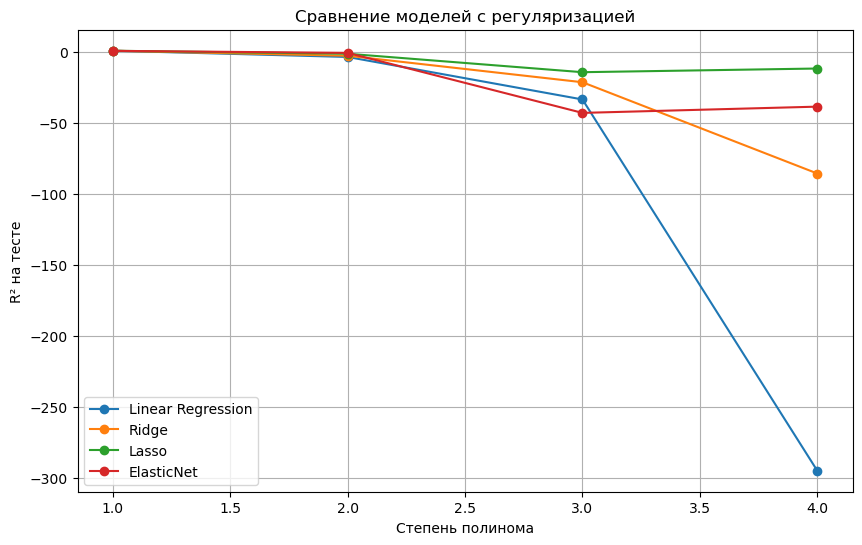

In [103]:
# –ó–∞–ø—É—Å–∫ —Ä–∞—Å—á–µ—Ç–∞
results_test_polinomial_features = polynomial_regression_with_regularization(X, y)

In [293]:
# –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è CatBoost

# –ì–ª–æ–±–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö (–ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, —á—Ç–æ –æ–Ω–∏ —É–∂–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã)
X = X[results_features_selection[results_features_selection['model'] == 'CatBoost']['best_features'][6]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[results_features_selection[results_features_selection['model'] == 'CatBoost']['best_features'][6]].drop(results_indices_selection[results_indices_selection['model'] == 'CatBoost']['removed_indices'][6])
y_train = y_train.drop(results_indices_selection[results_indices_selection['model'] == 'CatBoost']['removed_indices'][6])


def objective(trial):
    cb_params = {
        'iterations': trial.suggest_int('iterations', 50, 300),
        'depth': trial.suggest_int('depth', 4, 8),  # –£–∑–∫–∏–π –¥–∏–∞–ø–∞–∑–æ–Ω –≤–æ–∫—Ä—É–≥ –¥–µ—Ñ–æ–ª—Ç–Ω–æ–≥–æ 6
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),  # –í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ 0.1 –≤–º–µ—Å—Ç–æ 0.3
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 5),  # –ë–æ–ª–µ–µ —É–∑–∫–∏–π –¥–∏–∞–ø–∞–∑–æ–Ω
        'random_strength': trial.suggest_float('random_strength', 0.1, 2),  # –£–º–µ–Ω—å—à–µ–Ω –≤–µ—Ä—Ö–Ω–∏–π –ø—Ä–µ–¥–µ–ª
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 0.5),  # –ü–æ–Ω–∏–∂–µ–Ω –º–∞–∫—Å–∏–º—É–º
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 20),  # –£–º–µ–Ω—å—à–µ–Ω –¥–∏–∞–ø–∞–∑–æ–Ω
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise']),
        'random_seed': 42,
        'verbose': False
    }

    model = CatBoostRegressor(**cb_params)
    model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=(X_test, y_test))
    y_pred = model.predict(X_test)
    
    # –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º R¬≤ –∫–∞–∫ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –∞—Ç—Ä–∏–±—É—Ç
    trial.set_user_attr("r2", r2)
    
    return rmse

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è Optuna
study = optuna.create_study(
    direction='minimize',  # –ú–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ–º RMSE
    sampler=TPESampler(seed=42),
    pruner=MedianPruner(n_warmup_steps=5)
)

def log_trial_progress(study, trial):
    """Callback –¥–ª—è –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏—è –ø—Ä–æ–≥—Ä–µ—Å—Å–∞ —Å –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ–º RMSE –∏ R¬≤"""
    if trial.number == 0:
        print("| Trial |   RMSE   |   R¬≤    |")
        print("|-------|----------|---------|")
    
    rmse = trial.value if trial.value is not None else float('inf')
    r2 = trial.user_attrs.get("r2", 0.0)
    
    print(f"| {trial.number:5} | {rmse:.6f} | {r2:.6f} |")

# –ó–∞–ø—É—Å–∫ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
try:
    print("Optimizing CatBoost...")
    study.optimize(
        objective,
        n_trials=500,
        #callbacks=[log_trial_progress],
        gc_after_trial=True
    )
except KeyboardInterrupt:
    print("\nOptimization stopped by user").get_params()

# –ê–Ω–∞–ª–∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
if len(study.trials) > 0:
    # –ù–∞–π–¥–µ–º trial —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º R¬≤ —Å—Ä–µ–¥–∏ –ª—É—á—à–∏—Ö –ø–æ RMSE
    best_trials_cb = sorted(
        [t for t in study.trials if t.value is not None],
        key=lambda x: (x.value, -x.user_attrs["r2"])
    )
    
    best_trial_cb = best_trials_cb[0]
    
    print("\nBest trial:")
    print(f"  RMSE: {best_trial_cb.value:.6f}")
    print(f"  R¬≤: {best_trial_cb.user_attrs['r2']:.6f}")
    print("\nBest params:")
    for key, value in best_trial_cb.params.items():
        print(f"  {key}: {value}")
    
   

Optimizing CatBoost...

Best trial:
  RMSE: 285.256095
  R¬≤: 0.589715

Best params:
  iterations: 273
  depth: 5
  learning_rate: 0.07735178658615308
  l2_leaf_reg: 1.0080799048847042
  random_strength: 1.564234627121799
  bagging_temperature: 0.4168404884552308
  min_data_in_leaf: 1
  grow_policy: Depthwise


In [116]:
# –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è XGBoost

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[results_features_selection[results_features_selection['model'] == 'XGBoost']['best_features'][5]].drop(results_indices_selection[results_indices_selection['model'] == 'XGBoost']['removed_indices'][5])
y_train = y_train.drop(results_indices_selection[results_indices_selection['model'] == 'XGBoost']['removed_indices'][5])
X_test = X_test[results_features_selection[results_features_selection['model'] == 'XGBoost']['best_features'][5]]

def objective_xgb(trial):
    """–§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ XGBoost"""
    
    xgb_params = {
        'n_estimators': trial.suggest_int('xgb_n_estimators', 50, 500),
        'max_depth': trial.suggest_int('xgb_max_depth', 2, 12),
        'learning_rate': trial.suggest_float('xgb_learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('xgb_subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('xgb_gamma', 0, 5),
        'reg_alpha': trial.suggest_float('xgb_reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('xgb_reg_lambda', 0, 10),
        'random_state': 42,
        'n_jobs': -1
    }

    model = XGBRegressor(**xgb_params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    trial.set_user_attr("r2", r2)
    return rmse


study_xgb = optuna.create_study(
    direction='minimize',
    sampler=TPESampler(seed=42),
    pruner=MedianPruner(n_warmup_steps=5)
)

try:
    print("Optimizing XGBoost...")
    study_xgb.optimize(
        objective_xgb,
        n_trials=200,
        #callbacks=[log_trial_progress],
        gc_after_trial=True
    )
except KeyboardInterrupt:
    print("\nOptimization stopped by user")

if len(study_xgb.trials) > 0:
    best_trial_xg = study_xgb.best_trial
    print("\nBest XGBoost params:")
    for key, value in best_trial_xg.params.items():
        print(f"  {key}: {value}")
    print(f"Best RMSE: {best_trial_xg.value:.6f}")
    print(f"Best R¬≤: {best_trial_xg.user_attrs['r2']:.6f}")
    
   

Optimizing XGBoost...

Best XGBoost params:
  xgb_n_estimators: 289
  xgb_max_depth: 4
  xgb_learning_rate: 0.015037829910092374
  xgb_subsample: 0.9919503638648259
  xgb_colsample_bytree: 0.9452231580644855
  xgb_gamma: 1.4506133459456256
  xgb_reg_alpha: 3.582128157020251
  xgb_reg_lambda: 1.3231820148540026
Best RMSE: 280.948805
Best R¬≤: 0.602011


In [117]:
# –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è RandomForest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[results_features_selection[results_features_selection['model'] == 'RandomForest']['best_features'][4]].drop(results_indices_selection[results_indices_selection['model'] == 'RandomForest']['removed_indices'][4])
y_train = y_train.drop(results_indices_selection[results_indices_selection['model'] == 'RandomForest']['removed_indices'][4])
X_test = X_test[results_features_selection[results_features_selection['model'] == 'RandomForest']['best_features'][4]]

def objective_rf(trial):
    """–§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ RandomForest"""
    
    rf_params = {
        'n_estimators': trial.suggest_int('rf_n_estimators', 50, 500),
        'max_depth': trial.suggest_int('rf_max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('rf_min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('rf_min_samples_leaf', 1, 10),
        'max_features': trial.suggest_float('rf_max_features', 0.1, 1.0),
        'bootstrap': trial.suggest_categorical('rf_bootstrap', [True, False]),
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestRegressor(**rf_params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    trial.set_user_attr("r2", r2)
    return rmse


study_rf = optuna.create_study(
    direction='minimize',
    sampler=TPESampler(seed=42),
    pruner=MedianPruner(n_warmup_steps=5)
)

try:
    print("Optimizing RandomForest...")
    study_rf.optimize(
        objective_rf,
        n_trials=200,
        #callbacks=[log_trial_progress],
        gc_after_trial=True
    )
except KeyboardInterrupt:
    print("\nOptimization stopped by user")

if len(study_rf.trials) > 0:
    best_trial_rf = study_rf.best_trial
    print("\nBest RandomForest params:")
    for key, value in best_trial_rf.params.items():
        print(f"  {key}: {value}")
    print(f"Best RMSE: {best_trial_rf.value:.6f}")
    print(f"Best R¬≤: {best_trial_rf.user_attrs['r2']:.6f}")



Optimizing RandomForest...

Best RandomForest params:
  rf_n_estimators: 474
  rf_max_depth: 24
  rf_min_samples_split: 4
  rf_min_samples_leaf: 1
  rf_max_features: 0.5611880870028121
  rf_bootstrap: False
Best RMSE: 263.099358
Best R¬≤: 0.650976


In [118]:
# –°–æ–±–∏—Ä–∞–µ–º –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
best_results_total = []
linear = {
        'model': results_indices_selection[results_indices_selection['model'] == 'LinearRegression']['model'][0],
        'best_r2': results_indices_selection[results_indices_selection['model'] == 'LinearRegression']['best_r2'][0],
        'count_features': len(results_features_selection[results_features_selection['model'] == 'LinearRegression']['best_features'][0]),
        'count_strings': len(results_indices_selection[results_indices_selection['model'] == 'LinearRegression']['indices'][0])
    }
best_results_total.append(linear)
ridge = {
        'model': results_indices_selection[results_indices_selection['model'] == 'Ridge']['model'][1],
        'best_r2': ridge_results['best_score'],
        'count_features': len(results_features_selection[results_features_selection['model'] == 'Ridge']['best_features'][1]),
        'count_strings': len(results_indices_selection[results_indices_selection['model'] == 'Ridge']['indices'][1])
    }
best_results_total.append(ridge)
lasso = {
        'model': results_indices_selection[results_indices_selection['model'] == 'Lasso']['model'][2],
        'best_r2': lasso_results['best_score'],
        'count_features': len(results_features_selection[results_features_selection['model'] == 'Lasso']['best_features'][2]),
        'count_strings': len(results_indices_selection[results_indices_selection['model'] == 'Lasso']['indices'][2])
    }
best_results_total.append(lasso)
elastic = {
        'model': results_indices_selection[results_indices_selection['model'] == 'ElasticNet']['model'][3],
        'best_r2': elastic_results['best_score'],
        'count_features': len(results_features_selection[results_features_selection['model'] == 'ElasticNet']['best_features'][3]),
        'count_strings': len(results_indices_selection[results_indices_selection['model'] == 'ElasticNet']['indices'][3])
    }
best_results_total.append(elastic)
rf = {
        'model': results_indices_selection[results_indices_selection['model'] == 'RandomForest']['model'][4],
        'best_r2': best_trial_rf.user_attrs['r2'],
        'count_features': len(results_features_selection[results_features_selection['model'] == 'RandomForest']['best_features'][4]),
        'count_strings': len(results_indices_selection[results_indices_selection['model'] == 'RandomForest']['indices'][4])
    }
best_results_total.append(rf)
xg = {
        'model': results_indices_selection[results_indices_selection['model'] == 'XGBoost']['model'][5],
        'best_r2': best_trial_xg.user_attrs['r2'],
        'count_features': len(results_features_selection[results_features_selection['model'] == 'XGBoost']['best_features'][5]),
        'count_strings': len(results_indices_selection[results_indices_selection['model'] == 'XGBoost']['indices'][5])
    }
best_results_total.append(xg)
cb = {
        'model': results_indices_selection[results_indices_selection['model'] == 'CatBoost']['model'][6],
        'best_r2': best_trial_cb.user_attrs['r2'],
        'count_features': len(results_features_selection[results_features_selection['model'] == 'CatBoost']['best_features'][6]),
        'count_strings': len(results_indices_selection[results_indices_selection['model'] == 'CatBoost']['indices'][6])
    }
best_results_total.append(cb)

best_results_total_df = pd.DataFrame(best_results_total)

In [125]:
# –õ—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
best_results_total_df

model   best_r2  count_features  count_strings
0  LinearRegression  0.717347             114            491
1             Ridge  0.691435             114            478
2             Lasso  0.713671             114            461
3        ElasticNet  0.550389             116            373
4      RandomForest  0.650976              27            682
5           XGBoost  0.602011              18            762
6          CatBoost  0.546018              36            757